In [25]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('provider_healthcare/Train-1542865627584.csv')
test = pd.read_csv('provider_healthcare/Test-1542969243754.csv')
train_Ben = pd.read_csv('provider_healthcare/Train_Beneficiarydata-1542865627584.csv')
train_In = pd.read_csv('provider_healthcare/Train_Inpatientdata-1542865627584.csv')
train_IO = pd.read_csv('provider_healthcare/Train_Outpatientdata-1542865627584.csv')
test_Ben = pd.read_csv('provider_healthcare/Test_Beneficiarydata-1542969243754.csv')
test_IN = pd.read_csv('provider_healthcare/Test_Inpatientdata-1542969243754.csv')
test_IO = pd.read_csv('provider_healthcare/Test_Outpatientdata-1542969243754.csv')

This Kernel comprises the below tasks:

EDA on Beneficiary Data

EDA on In-patients & Out-patients Data

EDA on entire data after joining with Provider Tgt Labels

Feature Engineered (SET-1):

Basic EDA features
Single level Aggregated features
Multiple levels Aggregated features
Models trained and evaluated on SET-1 features
Feature Engineered (SET-2):
Basic EDA features
Code Embeddings Similarity Features:
CAD <--> Dx
CAD <--> PROC
Dx <--> PROC
Single level Aggregated features (excluding CAD, Dx & PROC codes)
Multiple levels Aggregated features (excluding no CAD, Dx & PROC codes)
Models trained and evaluated on SET-2 features
Kindly checkout the below WebApp for accessing the best trained model for this problem:

WebApp
Kindly checkout below link for gaining BUSINESS related insights about this problem:

Deck : Detailed Explanation
Kindly checkout below link for TECHNICAL description about this problem:

Technical Document
Kindly checkout below link for In-depth Description and Reasoning of all the Features ::

Features Description

### BENE Data - EDA

In [10]:
train.shape
train_In.shape
train_IO.shape


(517737, 27)

In [9]:
train_Ben.shape

(138556, 25)

In [11]:
train_Ben.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [12]:
train_Ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [13]:
train_Ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [14]:
train_Ben.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [18]:
train_Ben['BeneID'].nunique()

138556

In [19]:
train_Ben.Gender.unique()

array([1, 2], dtype=int64)

In [20]:
train_Ben['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [22]:
train_Ben['Gender'] = train_Ben['Gender'].apply(lambda val: 0 if val == 2 else 1)

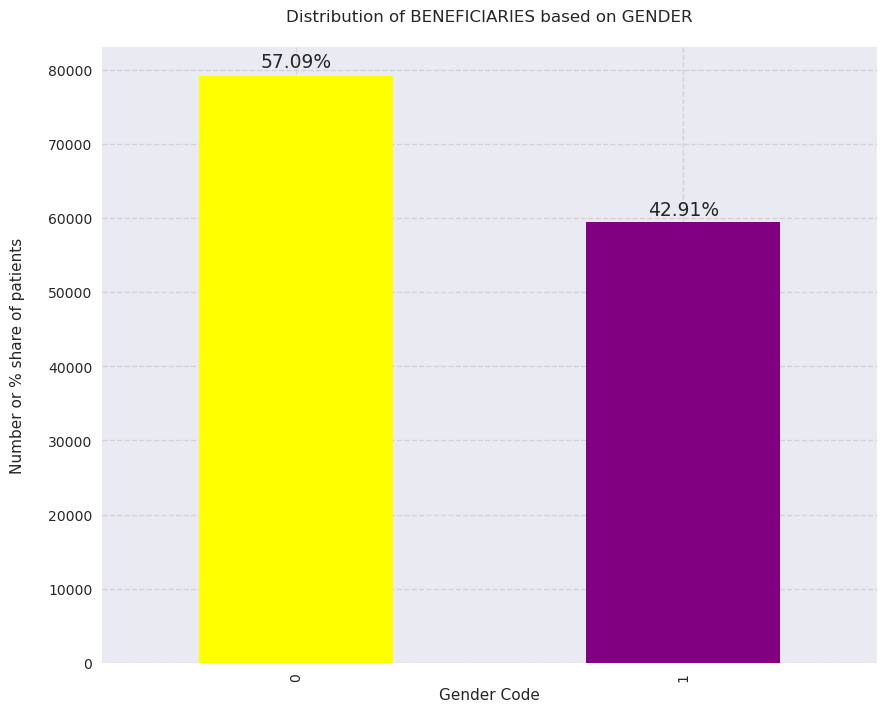

In [27]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of GENDER 
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = train_Ben['Gender'].value_counts().plot(kind='bar',color=['yellow','purple'])
     # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
     # Providing the labels and title to the graph
 # Providing the labels and title to the graph
    plt.xlabel("Gender Code")
    plt.ylabel("Number or % share of patients\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of BENEFICIARIES based on GENDER\n")

OBERVATION

From the above plot, we can decude that the ratio b/w GENDER_0 : GENDER_1 is 57% : 43%.

##### Q3. Lets calculate the AGE of every BENEFICIARY?

In [29]:
train_Ben['DOB'] = pd.to_datetime(train_Ben['DOB'], format="%Y-%m-%d")
# train_Ben['DOD']= pd.to_datetime(train_bene_df['DOD'], format="%Y-%m-%d")

In [31]:
train_Ben['Patient_Age_Year'] = train_Ben['DOB'].dt.year
train_Ben['Patient_Age_Month'] = train_Ben['DOB'].dt.month

Adding new feature :::::::::::::::::::::::: "YEAR of birth of beneficiaries"

In [32]:
ben_patient_year_birth = pd.DataFrame(train_Ben['Patient_Age_Year'].value_counts().reset_index(drop=False))
ben_patient_year_birth.columns=['year','num_of_beneficiaries']
ben_patient_year_birth = ben_patient_year_birth.sort_values(by='year')
                                      

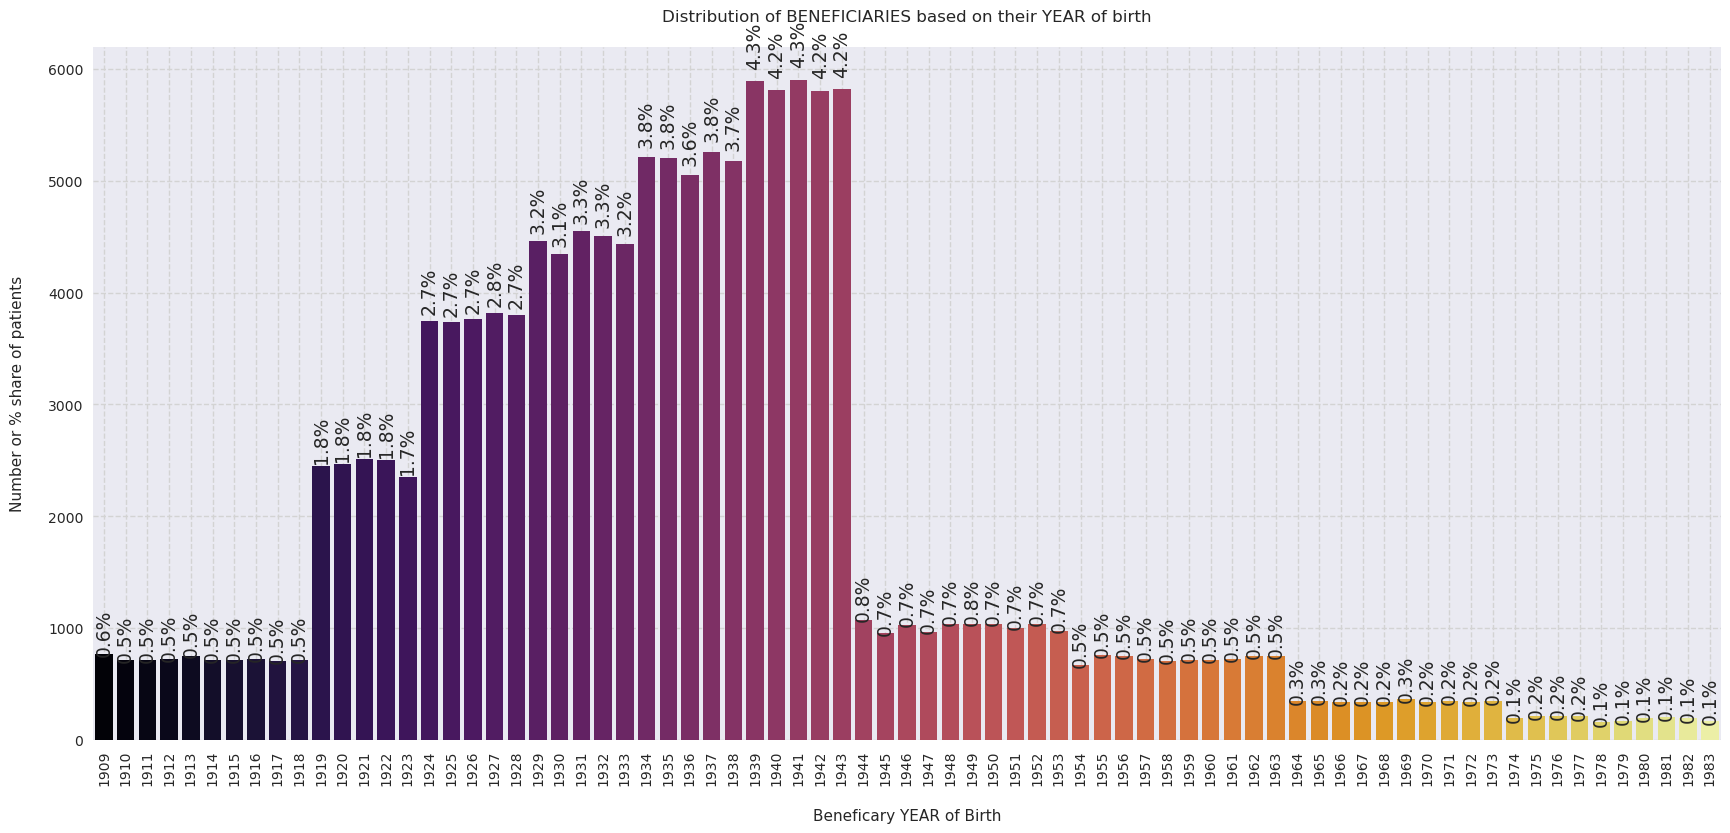

In [34]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(21,9))
    fig = sns.barplot(data=ben_patient_year_birth,x='year',y='num_of_beneficiaries',palette='inferno')
     # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
      # Providing the labels and title to the graph
    plt.xlabel("\nBeneficary YEAR of Birth")
    plt.xticks(rotation=90)
    plt.ylabel("Number or % share of patients\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Distribution of BENEFICIARIES based on their YEAR of birth\n")


OBERVATION

From the above plot, we can decude that the majority of the beneficiaries are from the YEAR - 1919 to 1943.
More specifically, overall the percentage of number of beneficiaries with YEAR of birth from 1939 to 1943 is the highest. Whereas, it is lowest from 1978 to 1983.
REASONING

The reason for adding the "YEAR of Birth of Beneficiaries" as a new feature in the dataset with the intent to find whether personal details has been forged by the beneficiary or its direct/indirect association with Fraud claims.

Adding new feature :::::::::::::::::::::::: "MONTH of birth of beneficiaries"

In [35]:
ben_month_birth = pd.DataFrame(train_Ben['Patient_Age_Month'].value_counts().reset_index(drop=False))
ben_month_birth.columns = ['month','num_of_ben']
ben_month_birth = ben_month_birth.sort_values(by='month')

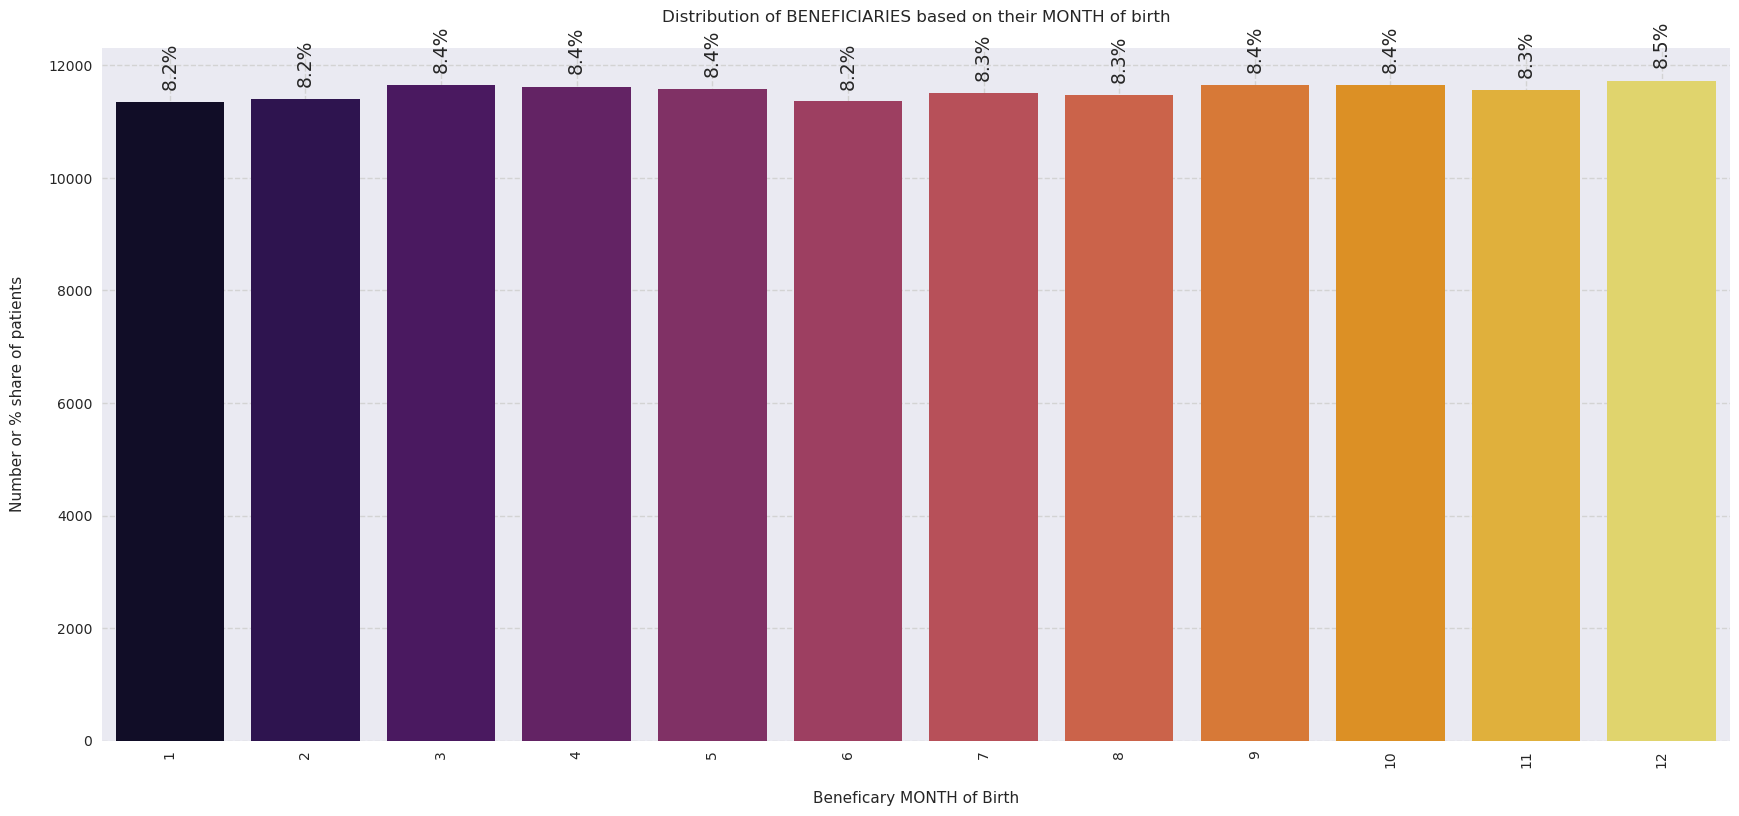

In [37]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(21,9))
    fig = sns.barplot(data=ben_month_birth,x='month',y='num_of_ben',palette='inferno')
     # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
      # Providing the labels and title to the graph
    plt.xlabel("\nBeneficary MONTH of Birth")
    plt.xticks(rotation=90)
    plt.ylabel("Number or % share of patients\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Distribution of BENEFICIARIES based on their MONTH of birth\n")

OBERVATION

From the above plot, we can decude that there is no such difference b/w the patients based on their MONTH of birth.
Initial, look suggests me that this feature might not be more of a use.
REASONING

The reason for adding the "MONTH of Birth of Beneficiaries" as a new feature in the dataset with the intent to find whether personal details has been forged by the beneficiary or its direct/indirect association with Fraud claims.

##### Adding new indicator :::::::::::::::::::::::: "Beneficiary Dead or Alive?"
This represent whether a patient is alive or not?
Here, the point to understand is that there can be ONE to MANY relationship b/w a BENEFICIARY and CLAIM filed, thus I'm making an assumption here is that beneficiaries with DOD as NA are alive, however this cannot be always true once we join it with CLAIMS data.
For example, A patient gets successfully operated for Kidney Failure on Sep 2012 and filed CLAIM-I. So, this claimed gets approved with DOD as NA.
Same patient gets operated after 4 months for Cardiac Failure but couldn't survived and filed CLAIM-II. Thus, for CLAIM-I this person shoud have DEAD_or_ALIVE indicator as FALSE whereas for CLAIM-II it should be TRUE.

REASONING
My intention behind adding this feature is to see whether FRAUD claims are higher for DEAD patients or not?
The reason here is that generally when an organized fraud happens then healthcare providers falsely diagnose, misdiagnose, or overdiagnose a disease, which can lead to harmful courses of medication or treatments or procedures being prescribed or performed. All of this together can lead to patient death.

In [42]:
# 0 means ALIVE and 1 means DEAD
train_Ben['Dead_or_Alive'] = train_Ben['DOD'].apply(lambda val: 0 if val != val else 1)

In [45]:
train_Ben['Dead_or_Alive'].value_counts()

0    137135
1      1421
Name: Dead_or_Alive, dtype: int64

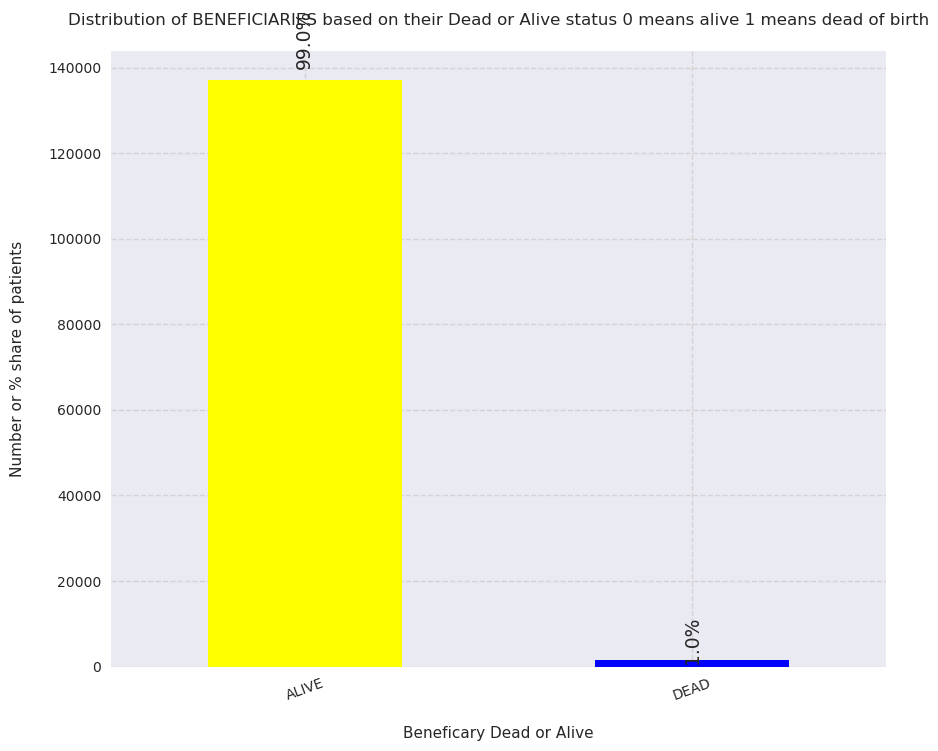

In [49]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = train_Ben['Dead_or_Alive'].value_counts().plot(kind='bar',color=['yellow','blue'])
     # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
      # Providing the labels and title to the graph
    plt.xlabel("\nBeneficary Dead or Alive")
    plt.xticks(labels=["ALIVE","DEAD"], ticks=[0,1], rotation=20)
    plt.ylabel("Number or % share of patients\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Distribution of BENEFICIARIES based on their Dead or Alive status 0 means alive 1 means dead of birth\n")

OBSERVATION
The above graph tells us that almost 99% of the beneficiaries are ALIVE and very small percentage of patients are DEAD. It would be good to see how much this feature has impact on the actual label.

In [51]:
train_Ben['DOD']  = pd.to_datetime(train_Ben['DOD'])
# Greatest Date of Death in the TRAIN set for beneficiaries
max_bene_DOD = max(train_Ben['DOD'].unique()[1:])
max_bene_DOD

numpy.datetime64('2009-12-01T00:00:00.000000000')

In [52]:
# For all NAN DODs filling the greatest Date of Death
train_Ben['DOD'].fillna(value=max_bene_DOD, inplace=True)

Adding new feature :::::::::::::::::::::::: "Beneficiary AGE"
This represent the AGE of the beneficiary.
REASONING
My intention behind adding this feature is to better analyse the CLAIM and Patient related data.

In [53]:
train_Ben['Age'] = np.round(((train_Ben['DOD'] - train_Ben['DOB']).dt.days)/365.0,1)

In [54]:
train_Ben.drop(labels=['DOD'],axis=1,inplace=True)

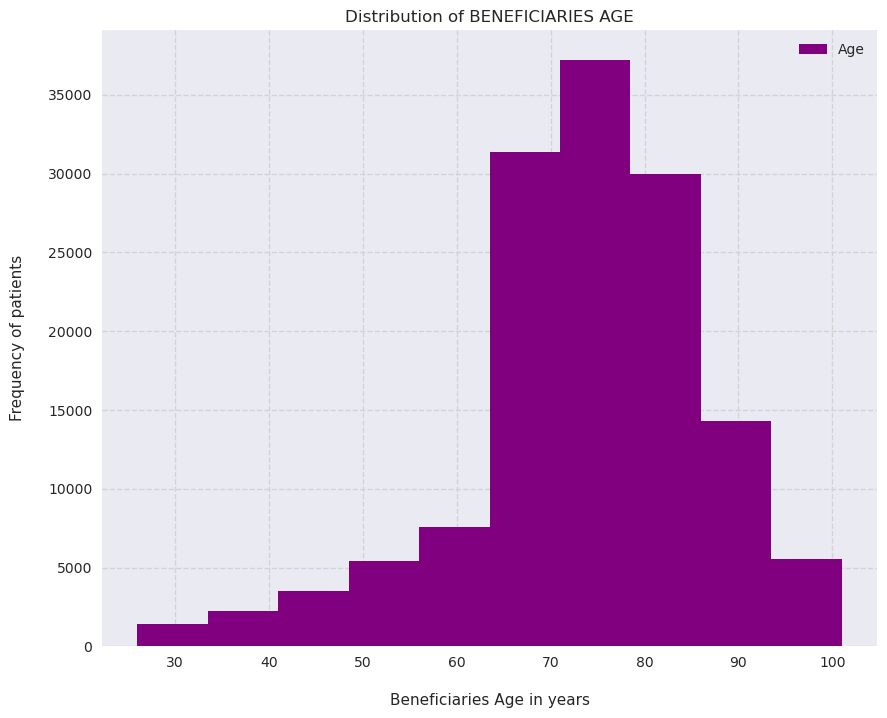

In [59]:
# Here, I'm displaying the distribution of AGE of Beneficiaries?
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  train_Ben['Age'].plot(kind='hist', color='purple')
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficiaries Age in years")
  plt.ylabel("Frequency of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES AGE")
  plt.legend();

OBSERVATION
The above graph tells us that the majority of the beneficiaries are b/w 65 to 85 years.

In [61]:
train_Ben['Age'].describe()

count    138556.000000
mean         73.632756
std          12.736605
min          26.000000
25%          68.000000
50%          74.300000
75%          82.000000
max         101.000000
Name: Age, dtype: float64

##### Adding new categorical column :::::::::::::::::::::::: "Beneficiary AGE brackets"
This will represent whether a patient falls in a specific AGE bracket?
[1-40] --> Group 1 --> Young

(40-60] --> Group 2 --> Mid Aged

(60-80] --> Group 3 --> Old

(80 or more] --> Group 4 --> Very Old

REASONING
My intention behind adding this feature is to see whether FRAUD claims are higher for specific AGE Groups?
The reasoning here is that there may be a potential pattern that providers files higher number of FRAUD claims for either a younger age group or very old age group.

In [62]:
def bene_age_brackets(val):
  if val >=1 and val <=40:
    return 'Young'
  elif val > 40 and val <=60:
    return 'Mid'
  elif val > 60 and val <= 80:
    return 'Old'
  else:
    return 'Very Old'

In [64]:
train_Ben['AGE_groups'] = train_Ben['Age'].apply(lambda age: bene_age_brackets(age))

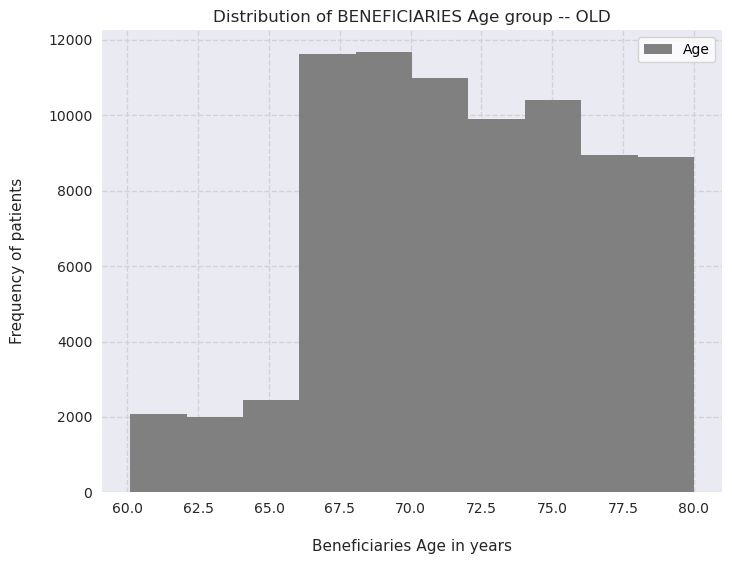

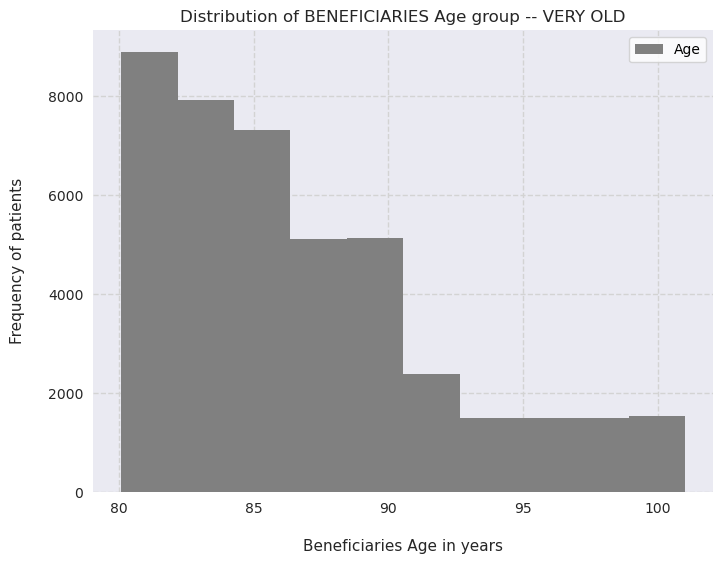

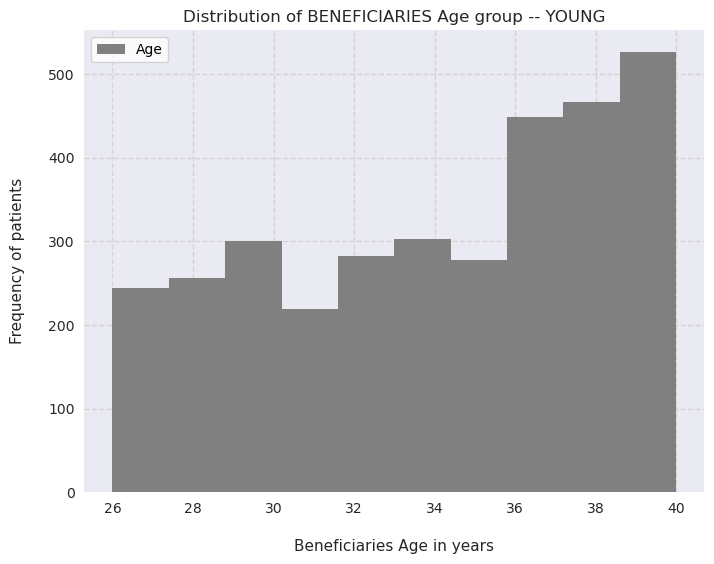

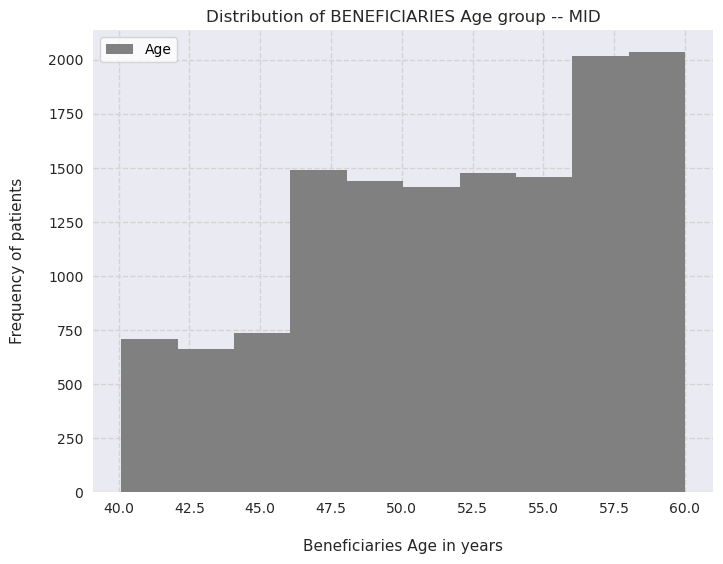

In [67]:
age_grps = list(train_Ben['AGE_groups'].unique())
for grp in age_grps:
     # Here, I'm displaying the distribution of AGE GROUPS of Beneficiaries?
    with plt.style.context('seaborn'):
        plt.figure(figsize=(8,6))
        train_Ben[train_Ben['AGE_groups']==grp]['Age'].plot(kind='hist', color='grey')
        
     # Providing the labels and title to the graph
    plt.xlabel("\nBeneficiaries Age in years")
    plt.ylabel("Frequency of patients\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of BENEFICIARIES Age group -- {}".format(str(grp).upper()))
    plt.legend();

OBSERVATION
The above graphs tells us about the spread of beneficiaries across the Age Groups.
For YOUNG group we can say that the spread is quite even across the ages of beneficiaries.

#### Q4. Lets see the ratio of GENDER across various HUMAN RACE?

The world population can be divided into 4 major races:
    
white/Caucasian

Mongoloid/Asian

Negroid/Black

Australoid.

This is based on a racial classification made by Carleton S. Coon in 1962. Refer here.

In [68]:
train_Ben['Race'].unique()

array([1, 2, 3, 5], dtype=int64)

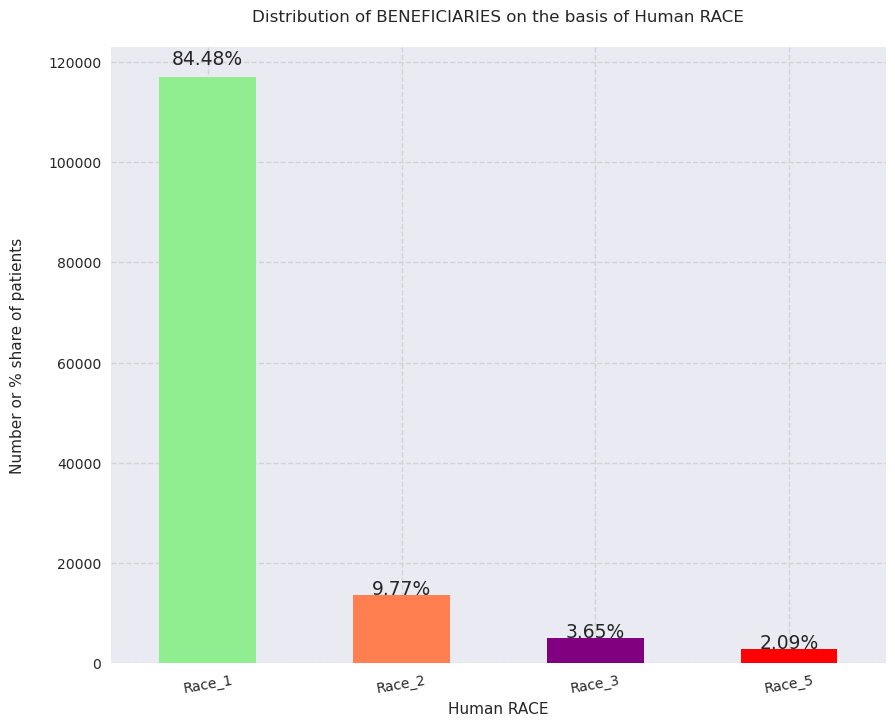

In [69]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of Human RACE
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_Ben['Race'].value_counts().plot(kind='bar', color=['lightgreen','coral','purple','red'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Human RACE")
  plt.xticks(labels=["Race_1","Race_2","Race_3","Race_5"], ticks=[0,1,2,3], rotation=10)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of Human RACE\n")

OBSERVATION
The above graph tells us that there is a serious imbalance in the records for Human Race categories.

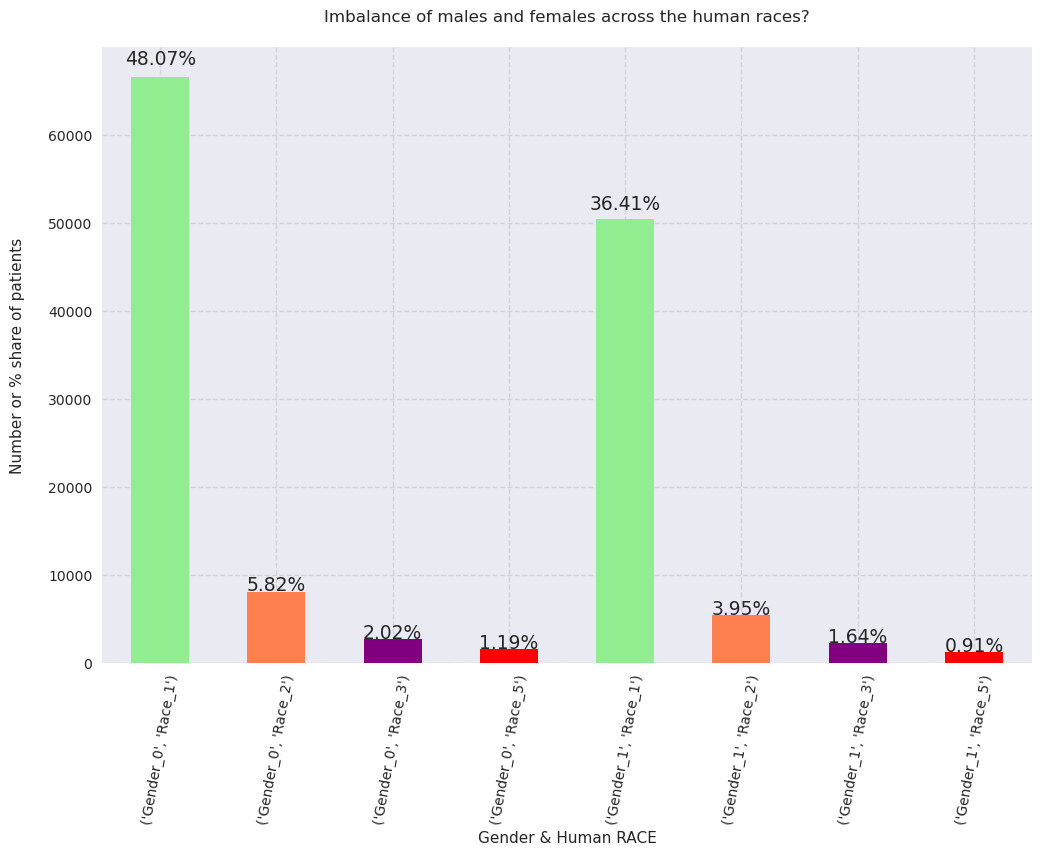

In [72]:
# Lets validate whether we have imbalance of males and females across the human races
with plt.style.context('seaborn'):
  plt.figure(figsize=(12,8))
  fig = train_Ben.groupby(['Gender','Race'])['Age'].count().plot(kind='bar', color=['lightgreen','coral','purple','red','lightgreen','coral','purple','red'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Gender & Human RACE")
  plt.xticks(labels=[("Gender_0","Race_1"), ("Gender_0","Race_2"), ("Gender_0","Race_3"), ("Gender_0","Race_5"),("Gender_1","Race_1"), ("Gender_1","Race_2"), ("Gender_1","Race_3"), ("Gender_1","Race_5")],
             ticks=[0,1,2,3,4,5,6,7], rotation=80)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Imbalance of males and females across the human races?\n")

OBSERVATION

The above graph shows us whether we have an imbalance of males or females across the human races.
And, it looks like within a specific human race there is no such gender imbalance.

##### Q5. Lets see the number of beneficiaries with Chronic Renal Disease.
There are two main types of kidney disease - short-term (acute kidney injury) and lifelong (chronic).

The two main types of kidney disease are short-term (acute kidney injury) and lifelong (chronic kidney disease).

Chronic kidney disease, also known as chronic renal disease or CKD, is a condition characterized by a gradual loss of kidney function over time.
What are the main causes of chronic kidney disease?

Diabetes and high blood pressure, or hypertension, are responsible for two-thirds of chronic kidney disease cases.

   RenalDiseaseIndicator
0                 118978
Y                  19578 



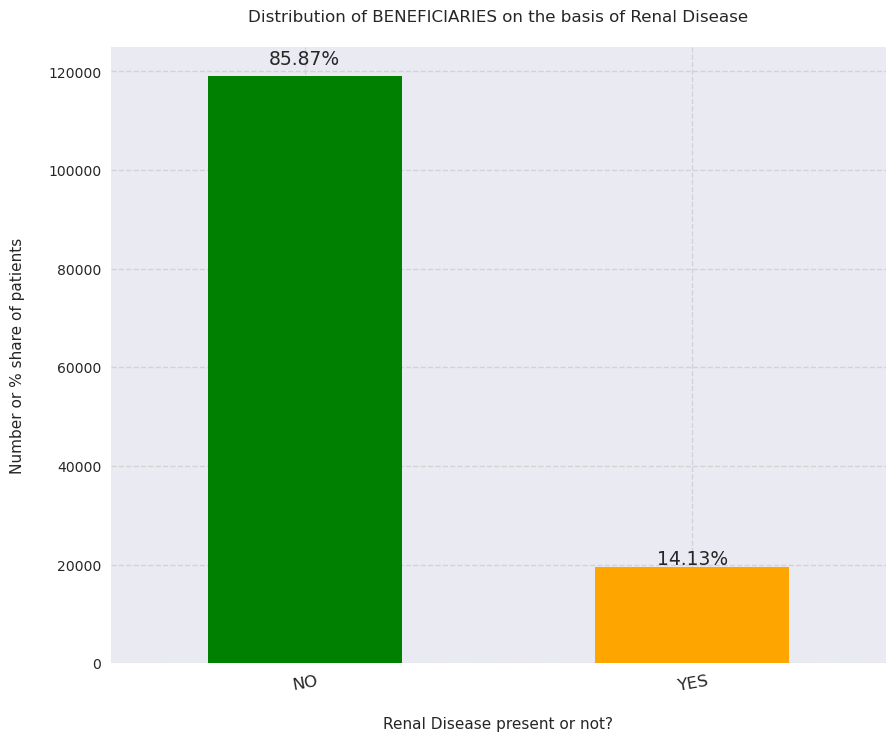

In [74]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of State
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_Ben['RenalDiseaseIndicator'].value_counts().plot(kind='bar', color=['green','orange'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nRenal Disease present or not?")
  plt.xticks(labels=["NO","YES"], ticks=[0,1], rotation=10, size=12)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of Renal Disease\n")

  # 0 means NO and 1 means YES
  print(pd.DataFrame(train_Ben['RenalDiseaseIndicator'].value_counts()),"\n")

OBSERVATION

Above graph tells us that around 14% of beneficiaries has or had Kidney Failure(Renal Disease).

   ChronicCond_KidneyDisease
2                      95277
1                      43279 



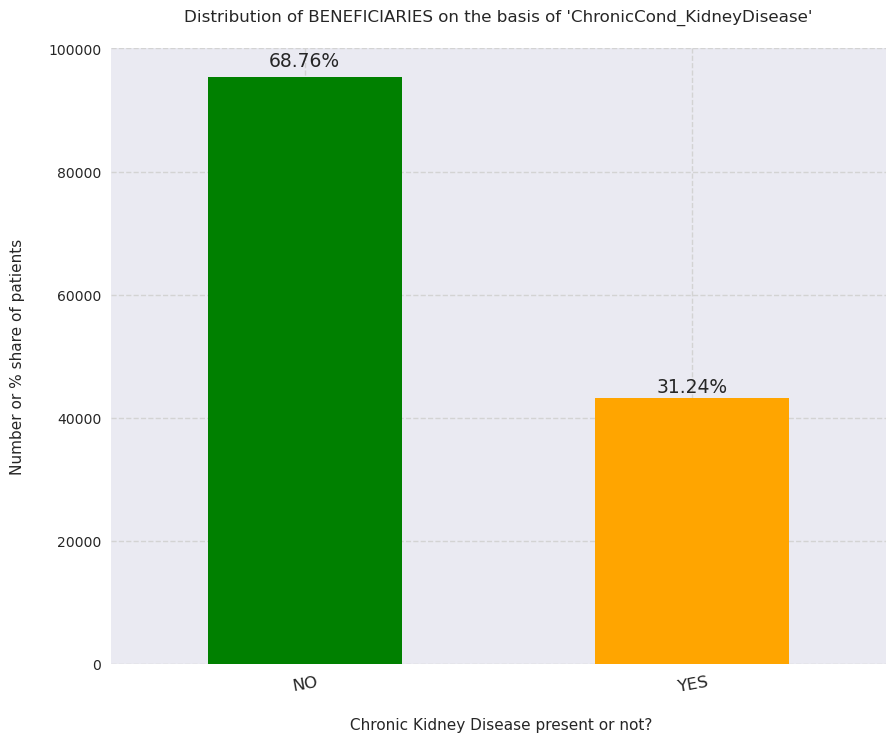

In [77]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of "ChronicCond_KidneyDisease"
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_Ben['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar', color=['green','orange'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\n Chronic Kidney Disease present or not?")
  plt.xticks(labels=["NO","YES"], ticks=[0,1], rotation=10, size=12)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_KidneyDisease'\n")

# I believe 2 means NO and 1 means YES
print(pd.DataFrame(train_Ben['ChronicCond_KidneyDisease'].value_counts()),'\n')

OBSERVATION

Above graph tells us that around 31% of Beneficiaries had Chronic Kidney Disease.

In the beneficiary dataset, we have 2 columns:
    
RenalDisease

ChronicCond_KidneyDisease Both of these columns appears to be representing the beneficiary history about the kidney disease.
I found this link useful in order to understand the difference b/w both of these. It looks they have RenalDisease indicator to represent whether the beneficiary has or had Kidney Failure. And, ChronicCond_KidneyDisease represents the long term Kidney Disease may be like not functioning to the fullest.

                                                 Gender
RenalDiseaseIndicator ChronicCond_KidneyDisease        
0                     1                           27768
                      2                           91210
Y                     1                           15511
                      2                            4067 



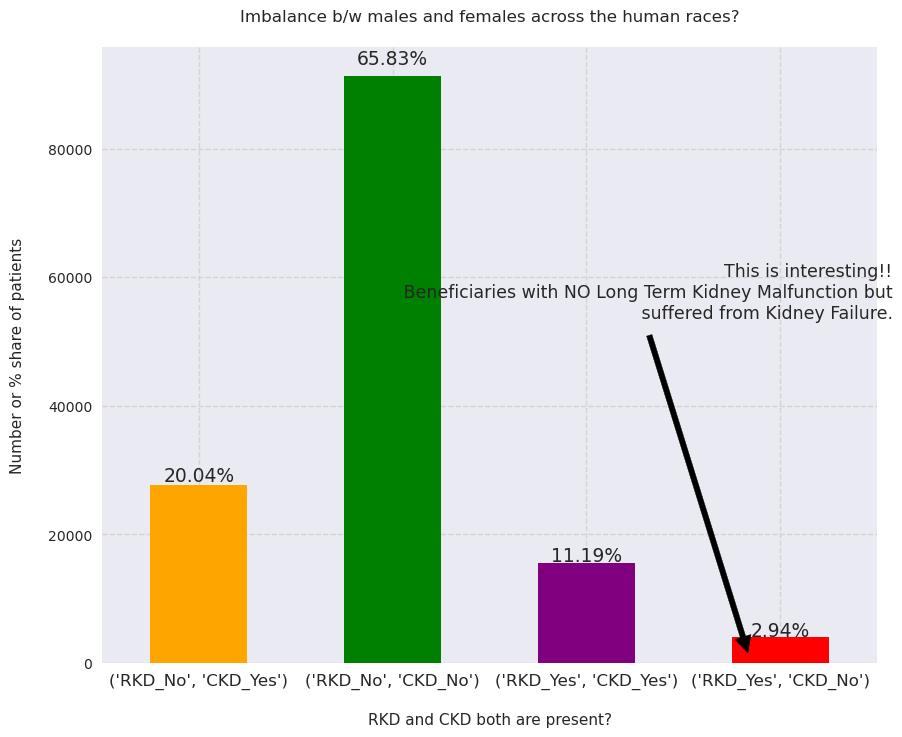

In [81]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of "ChronicCond_KidneyDisease"
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
#   fig = train_Ben['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar', color=['green','orange'])
  fig = train_Ben.groupby(['RenalDiseaseIndicator','ChronicCond_KidneyDisease'])['Gender'].count().plot(kind='bar', color=['orange','green','purple','red'])  
   # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5)
  
  # Added the Description for one of the horizontal bar
  fig.annotate('This is interesting!!\n Beneficiaries with NO Long Term Kidney Malfunction but\n suffered from Kidney Failure.', 
               xy=(2.85, 0.85),  xycoords='data', xytext=(1.02, 0.65), textcoords='axes fraction', fontsize=12.5,
               arrowprops=dict(facecolor='black', shrink=0.03), horizontalalignment='right', verticalalignment='top')

  # Providing the labels and title to the graph
  plt.xlabel("\nRKD and CKD both are present?")
  plt.xticks(labels=[("RKD_No","CKD_Yes"), ("RKD_No","CKD_No"), ("RKD_Yes","CKD_Yes"), ("RKD_Yes","CKD_No")], ticks=[0,1,2,3], rotation=0, size=12)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Imbalance b/w males and females across the human races?\n")

# RKD --> Renal Disease Indicator
# CKD --> Chronic Condition Kidney Disease
print(pd.DataFrame(train_Ben.groupby(['RenalDiseaseIndicator','ChronicCond_KidneyDisease'])['Gender'].count()),"\n")

OBSERVATION

In the above, we came to know that 2.94% of beneficiaries had no previously CKD but suffered from RKD. It would be good to check how many out these end-up as FRAUD claims.

In [82]:
train_Ben['State'].unique()

array([39, 52, 24, 23, 45, 15, 44, 41,  1, 14,  7, 13, 34, 31,  5, 49, 46,
        6, 38, 10, 26,  3, 20, 33, 18, 27, 51, 29, 42, 36, 11, 12, 30, 19,
        4, 25, 17, 16, 32,  2, 21, 50, 22, 54, 28, 43, 35, 37, 47,  8,  9,
       53], dtype=int64)

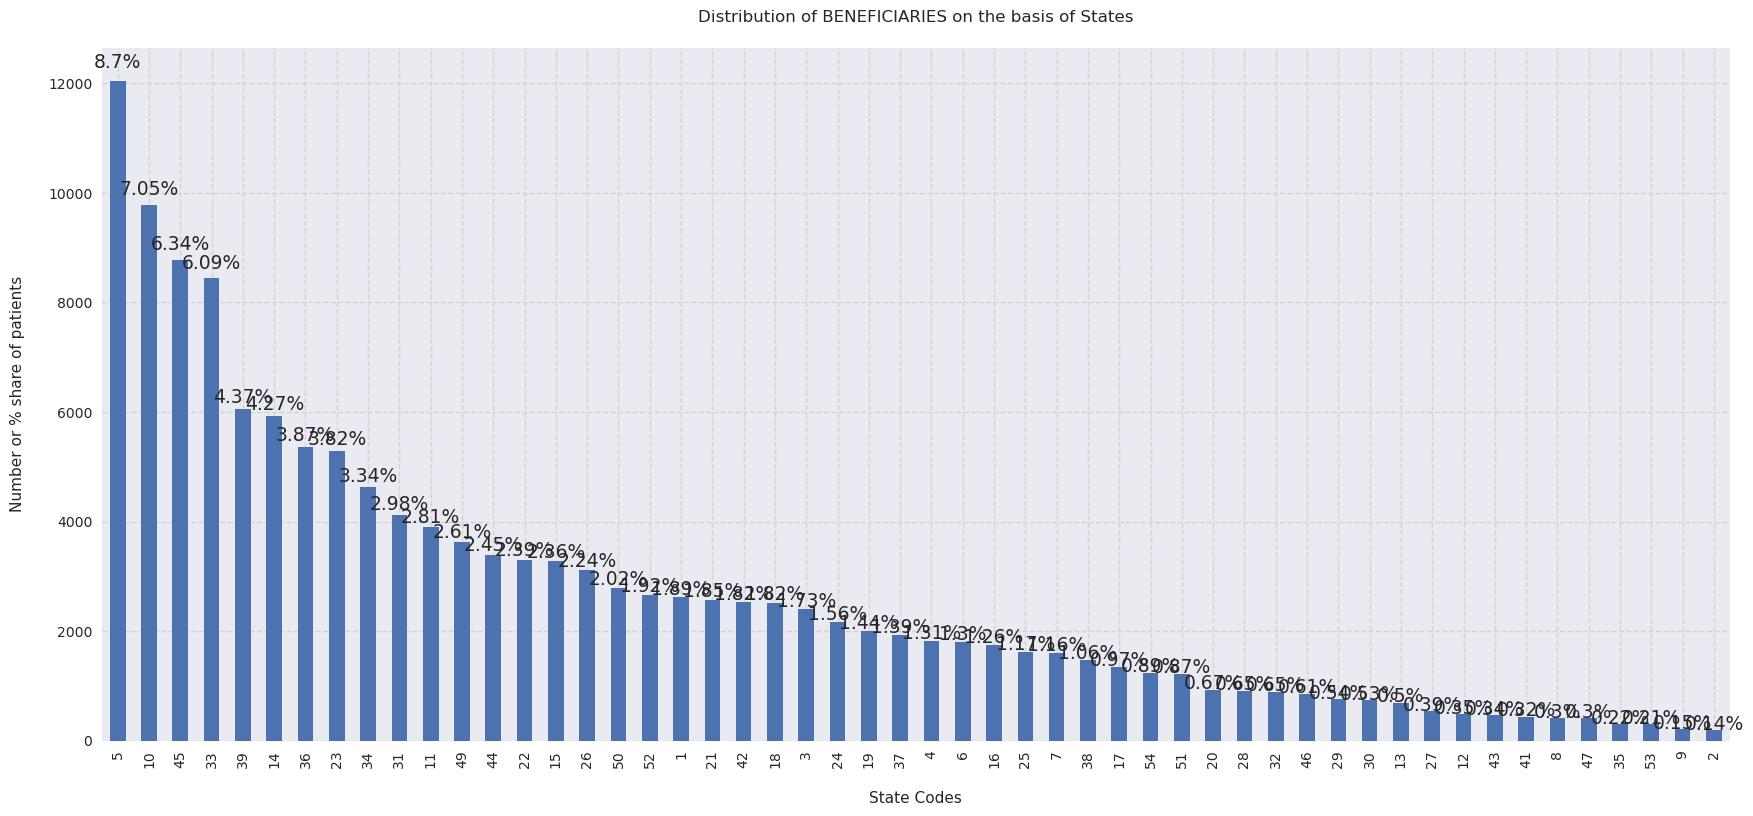

In [85]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of "ChronicCond_KidneyDisease"
with plt.style.context('seaborn'):
  plt.figure(figsize=(21,9))
  fig = train_Ben['State'].value_counts().plot(kind='bar')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nState Codes")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of States\n")

OBSERVATION

The above graph shows us that for some States the number of beneficiaries are more as compared to the others. And, the maximum number of beneficiaries are from State-5.

##### Q7. Lets see the number of beneficiaries on the basis of Country Codes.

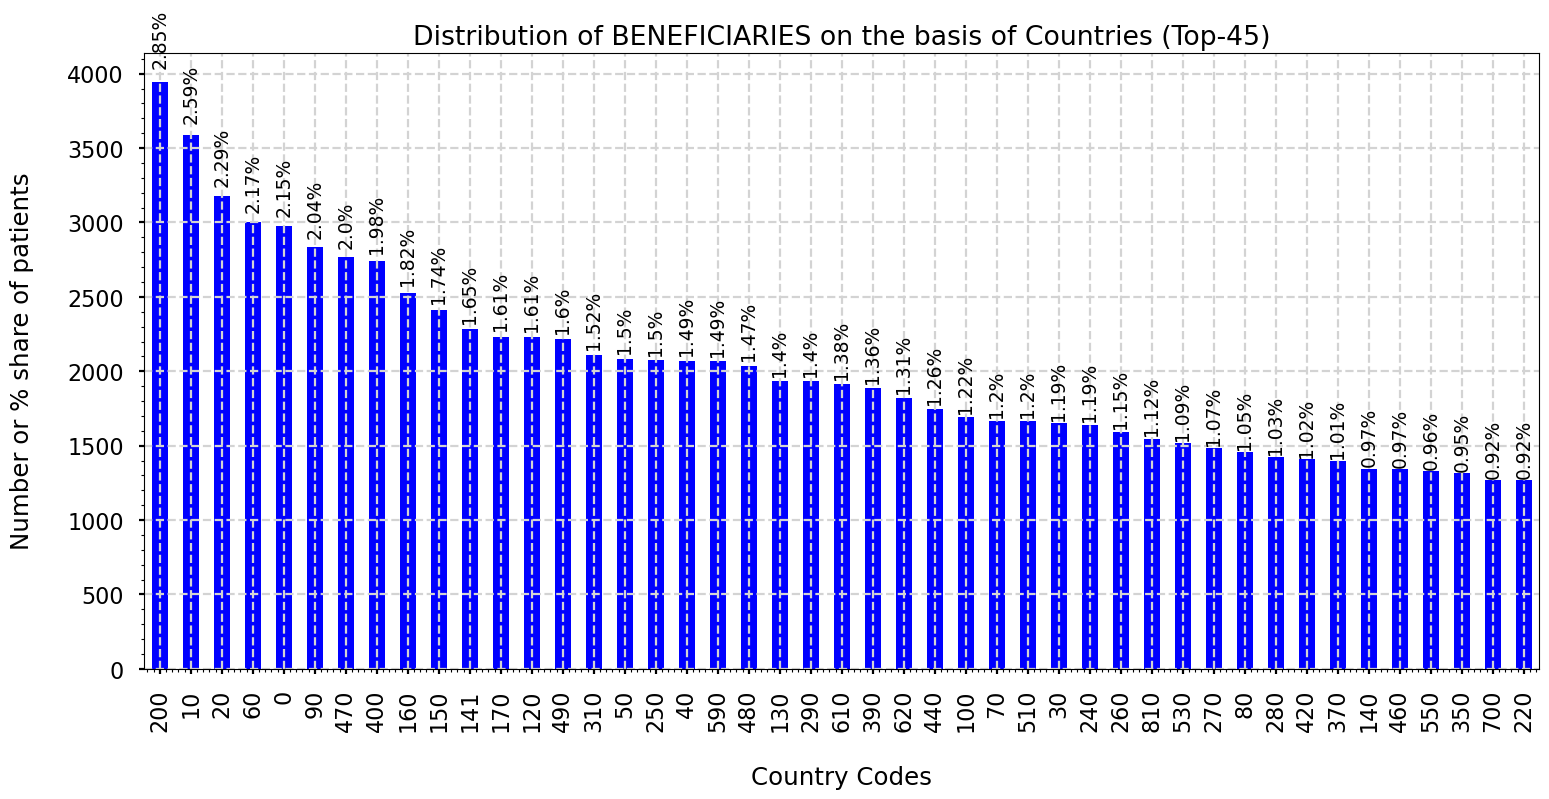

In [94]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of Country
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(18,8))
  fig = train_Ben['County'].value_counts()[0:45].plot(kind='bar', color='blue')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nCountry Codes")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of Countries (Top-45)")

In [97]:
# Countries with only handful of beneficiaries
train_Ben['County'].value_counts()[::-1][0:45]

521    1
753    1
834    1
117    1
742    1
804    1
944    1
744    1
796    1
14     2
84     2
875    2
691    2
912    2
904    2
712    2
873    3
672    3
876    3
1      3
785    3
412    3
844    3
632    3
161    3
955    3
862    3
793    3
662    4
887    4
612    4
893    4
34     4
583    4
755    4
931    4
903    4
878    5
292    5
542    5
271    5
797    5
784    5
562    5
431    5
Name: County, dtype: int64

OBSERVATION

The above graph shows us that distribution of beneficiaries based upon the country codes. Some having very high number of beneficiaries and others have very less.
NOTE

One thing still needs to be evaluated that whether some specific state or country code has higher number of frauds?

##### Q8.1 Lets see the number of beneficiaries on the basis of 'NoOfMonths_PartACov'.

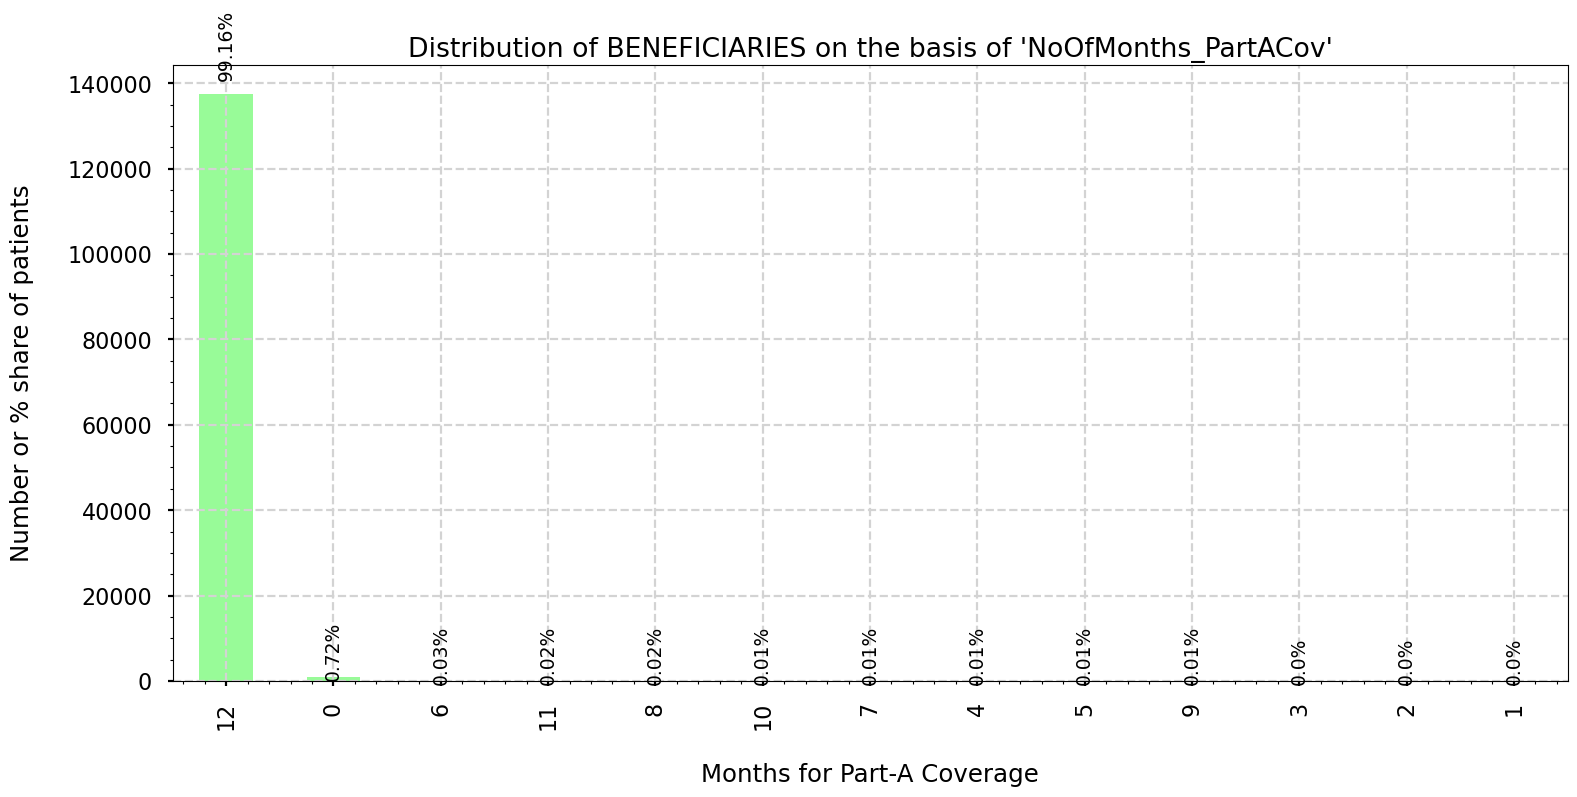

In [99]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of NoOfMonths_PartACov
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(18,8))
  fig = train_Ben['NoOfMonths_PartACov'].value_counts().plot(kind='bar', color='palegreen')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nMonths for Part-A Coverage")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'NoOfMonths_PartACov'")

OBSERVATION

The above graph shows us that more than 99% of beneficiaries have 12 months Part-A Coverage. My initial look to above plot tells me that this feature won't have much impact on the tgt labels.

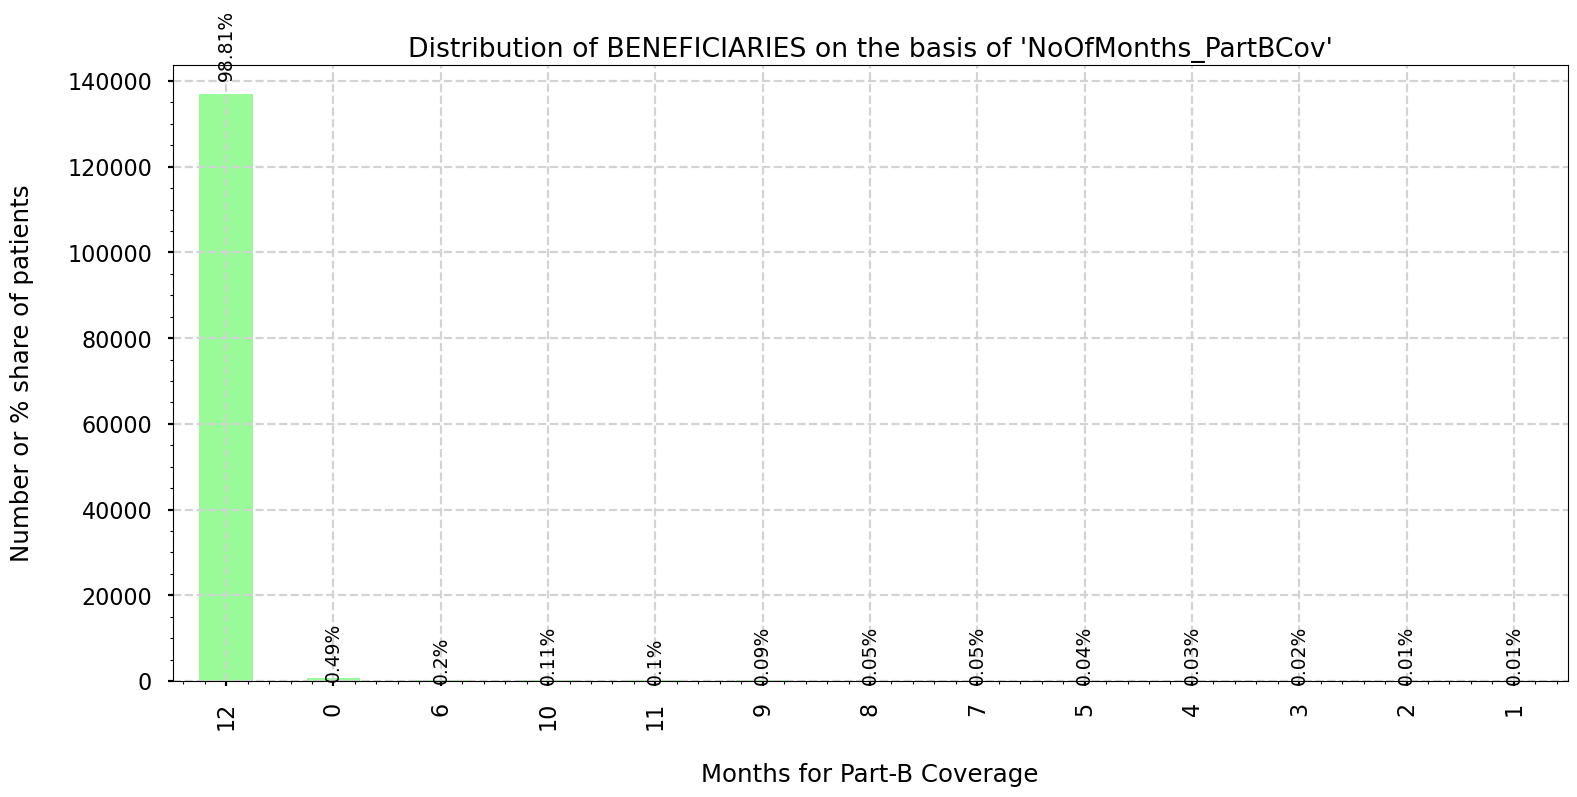

In [101]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of NoOfMonths_PartACov
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(18,8))
  fig = train_Ben['NoOfMonths_PartBCov'].value_counts().plot(kind='bar', color='palegreen')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nMonths for Part-B Coverage")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'NoOfMonths_PartBCov'")

##### Q9 Lets see the number of beneficiaries on the basis of 'ChronicCond_Alzheimer'. And, the Annual IP & OP expenditures for such patients.

In [102]:
train_Ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   Gender                           138556 non-null  int64         
 3   Race                             138556 non-null  int64         
 4   RenalDiseaseIndicator            138556 non-null  object        
 5   State                            138556 non-null  int64         
 6   County                           138556 non-null  int64         
 7   NoOfMonths_PartACov              138556 non-null  int64         
 8   NoOfMonths_PartBCov              138556 non-null  int64         
 9   ChronicCond_Alzheimer            138556 non-null  int64         
 10  ChronicCond_Heartfailure         138556 non-

   ChronicCond_Alzheimer
2                  92530
1                  46026 



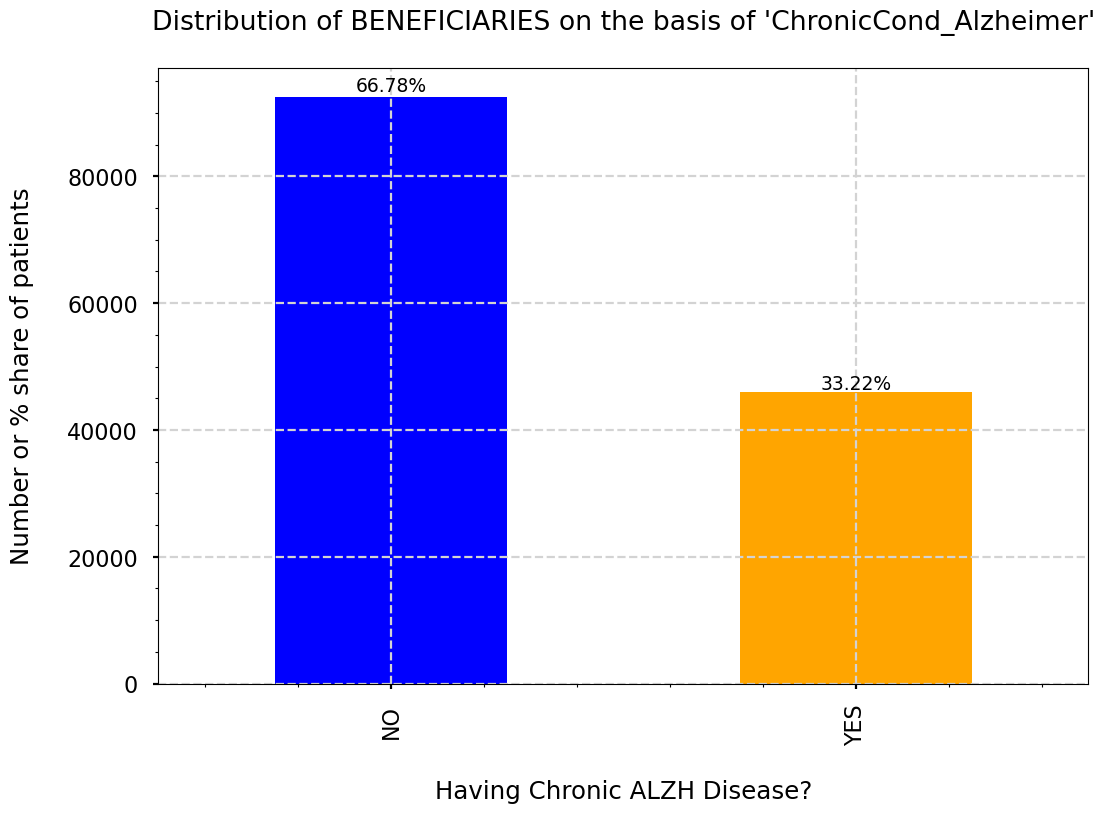

In [104]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = train_Ben['ChronicCond_Alzheimer'].value_counts().plot(kind='bar', color=['blue','orange'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_Ben.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'])
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(train_Ben['ChronicCond_Alzheimer'].value_counts()),"\n")

OBSERVATION

The above graph shows us that the beneficiaries with Chronic ALZH Disease are almost half as compared to the non-ALZH beneficiaries.

                       IPAnnualReimbursementAmt
ChronicCond_Alzheimer                          
1                                     247213280
2                                     259949690 



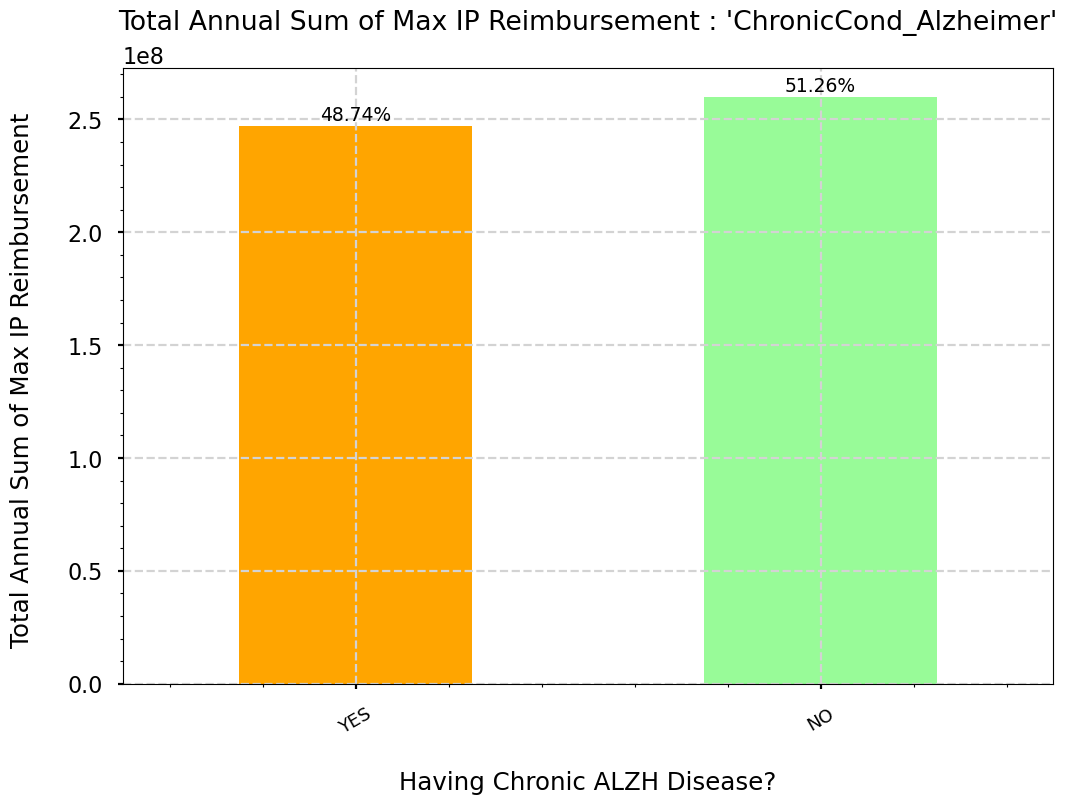

In [105]:
# Here, I'm displaying the Total Annual Sum of Max IP Reimbursement for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum().plot(kind='bar', color=['orange','palegreen'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/(train_Ben["IPAnnualReimbursementAmt"].sum()),2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of Max IP Reimbursement \n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max IP Reimbursement : 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum()),"\n")

OBSERVATION

The above graph shows us that despite the non-ALZH beneficiaries are double in number as compared to their counterparts, however, the Annual Sum of MAX IP Reimbursement is almost same for both the groups.
This means if a beneficiary with or without chronic ALZH Disease get admitted then the annual reimbursement paid is approx same.
The difference is of 13 Million or 2.52%.

                       OPAnnualReimbursementAmt
ChronicCond_Alzheimer                          
1                                      74721530
2                                     105154550 



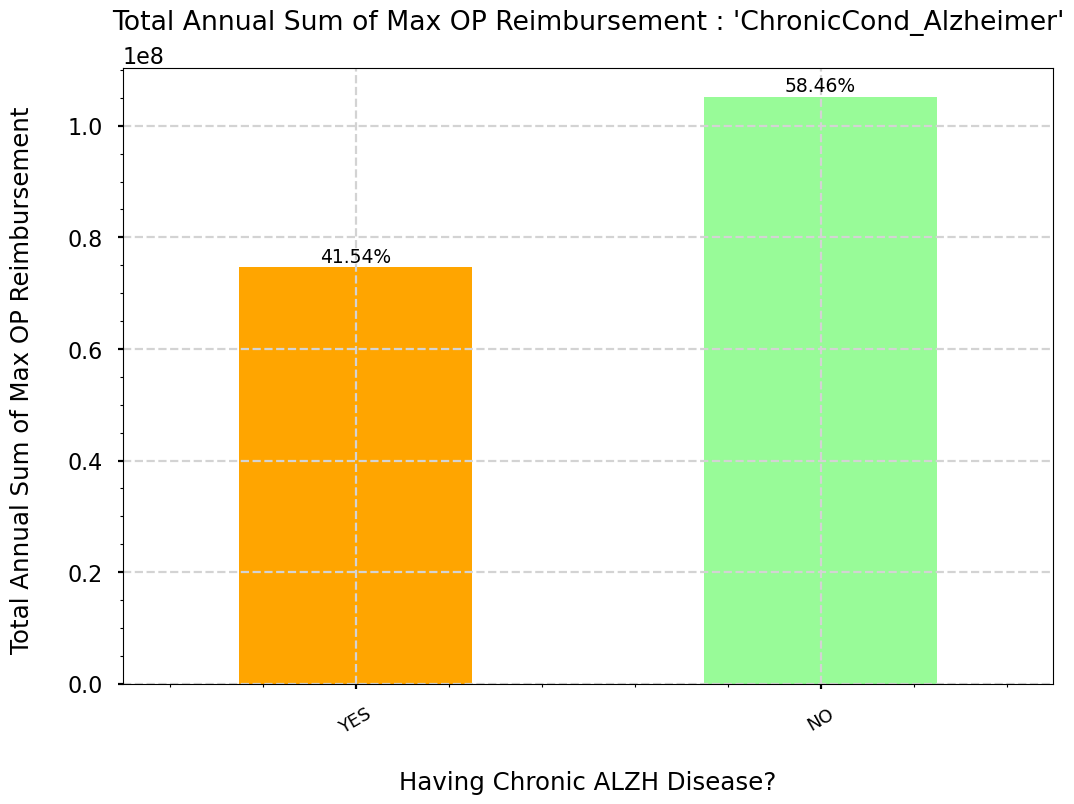

In [107]:
# Here, I'm displaying the Total Annual Sum of Max IP Reimbursement for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum().plot(kind='bar', color=['orange','palegreen'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/(train_Ben["OPAnnualReimbursementAmt"].sum()),2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of Max OP Reimbursement \n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max OP Reimbursement : 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum()),"\n")

OBSERVATION

The above graph shows us that the Annual Sum of OP Reimbursement for non-chronic ALZH Disease beneficiaries is more than 31 Million or 16.92% than the other group.

                       IPAnnualDeductibleAmt
ChronicCond_Alzheimer                       
1                                   28200854
2                                   27200388 



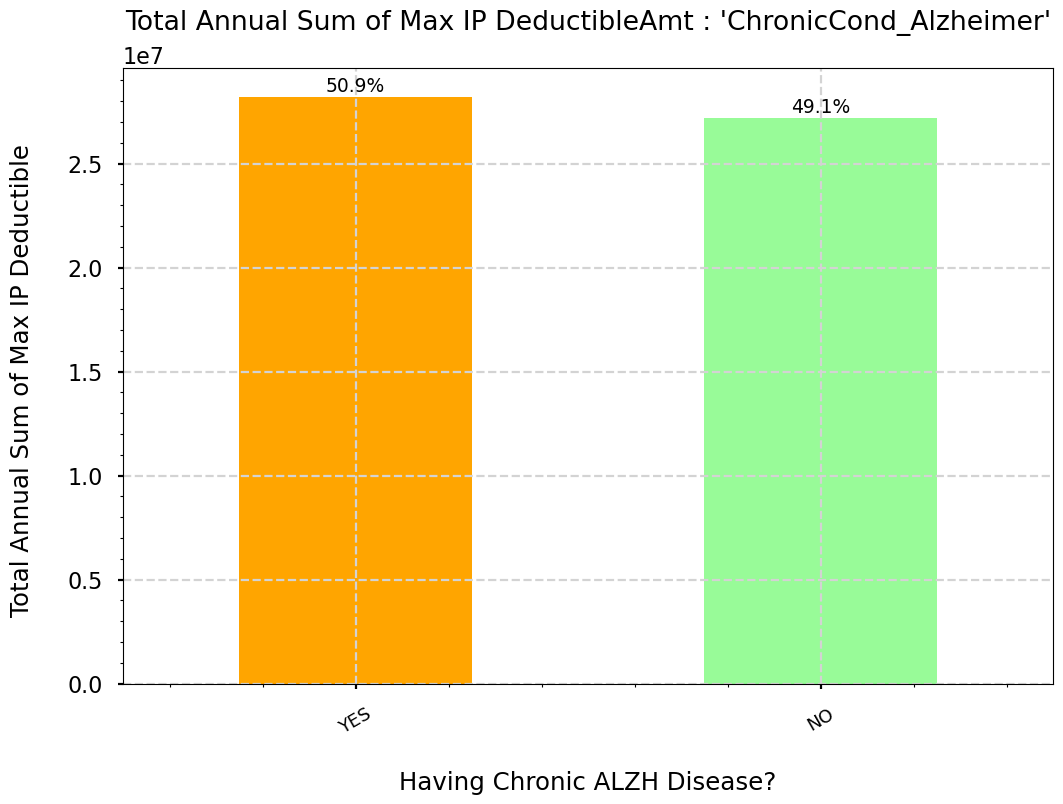

In [108]:
# Here, I'm displaying the Total Annual Sum of Max IP Reimbursement for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum().plot(kind='bar', color=['orange','palegreen'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/(train_Ben["IPAnnualDeductibleAmt"].sum()),2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of Max IP Deductible \n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of Max IP DeductibleAmt : 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum()),"\n")

OBSERVATION

The above graph shows us that the Annual Sum of IP Co-payment paid by the patient of non-chronic & chronic ALZH Disease is almost same. The difference is only of 10 Million or 1.8%.
So, we can say that the re-imbursement & co-payment amounts are same for chronic and non-chronic patients if they gets admitted.

                       OPAnnualDeductibleAmt
ChronicCond_Alzheimer                       
1                                   21502981
2                                   30832150 



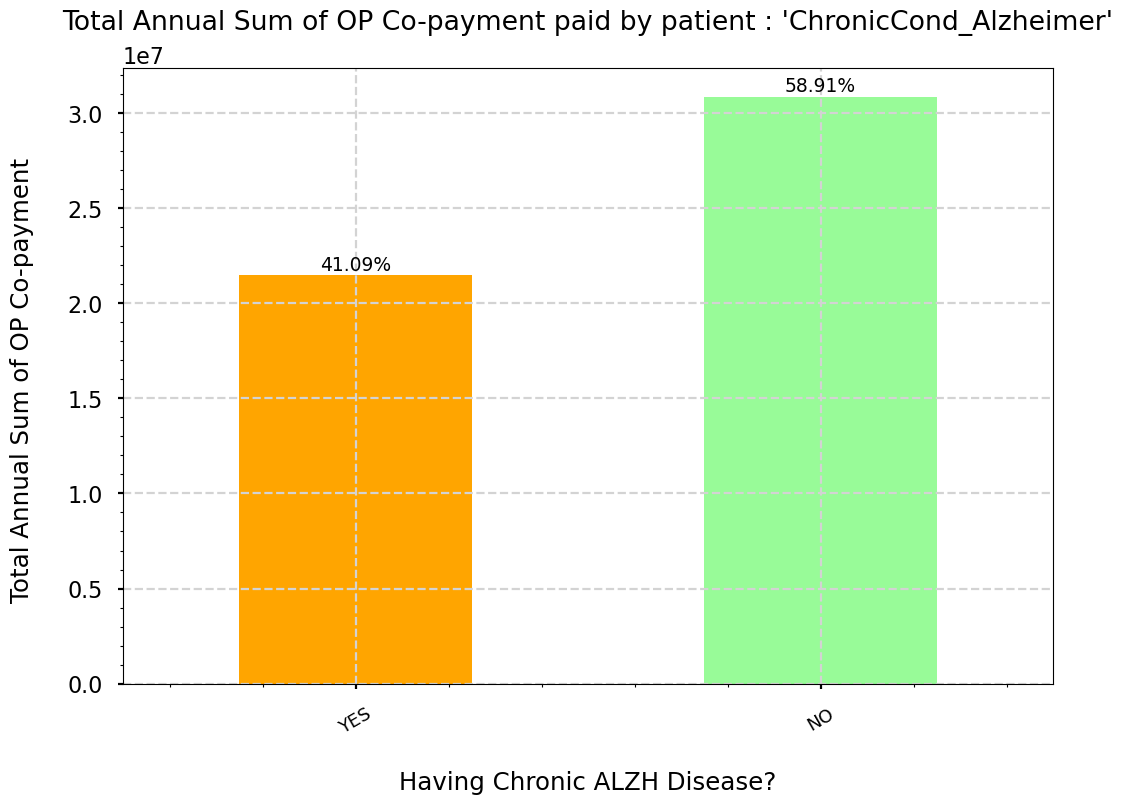

In [111]:
# Here, I'm displaying the Total Annual Sum of OP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum().plot(kind='bar', color=['orange','palegreen'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/(train_Ben["OPAnnualDeductibleAmt"].sum()),2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum of OP Co-payment \n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of OP Co-payment paid by patient : 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum()),"\n")

OBSERVATION

The above graph shows us that the Annual Sum of OP Co-payment paid by the patient of non-chronic is more as compared to chronic ALZH Disease. The difference is of 93.3 Million or 17.82%.
So, we can say that the co-payment paid by non-admitted patients is higher than the ones who gets admitted.

In [112]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())

,BeneID
ChronicCond_Alzheimer,
1,46026
2,92530


In [113]:
CC_ALZH_IP_R = pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum() / train_Ben.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_ALZH_IP_R

,AVG IP Reimbursement Amt
ChronicCond_Alzheimer,
1,5371.165863
2,2809.355777


In [114]:
CC_ALZH_OP_R = pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum() / train_Ben.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_ALZH_OP_R

,AVG OP Reimbursement Amt
ChronicCond_Alzheimer,
1,1623.463477
2,1136.437372


In [115]:
CC_ALZH_IP_D = pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum() / train_Ben.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_D.columns = ['AVG IP Co-payment Amt']
CC_ALZH_IP_D

,AVG IP Co-payment Amt
ChronicCond_Alzheimer,
1,612.715726
2,293.962909


In [118]:
CC_ALZH_OP_D = pd.DataFrame(train_Ben.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum() / train_Ben.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_D.columns = ['AVG OP Co-payment Amt']
CC_ALZH_OP_D

,AVG OP Co-payment Amt
ChronicCond_Alzheimer,
1,467.192044
2,333.212472


In [119]:
CC_ALZH_all_amts = pd.concat([CC_ALZH_IP_R, CC_ALZH_OP_R, CC_ALZH_IP_D, CC_ALZH_OP_D], axis=1)
CC_ALZH_all_amts

,AVG IP Reimbursement Amt,AVG OP Reimbursement Amt,AVG IP Co-payment Amt,AVG OP Co-payment Amt
ChronicCond_Alzheimer,,,,
1,5371.165863,1623.463477,612.715726,467.192044
2,2809.355777,1136.437372,293.962909,333.212472


                       AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Alzheimer                                                       
1                                   5371.165863               1623.463477   
2                                   2809.355777               1136.437372   

                       AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Alzheimer                                                
1                                 612.715726             467.192044  
2                                 293.962909             333.212472   



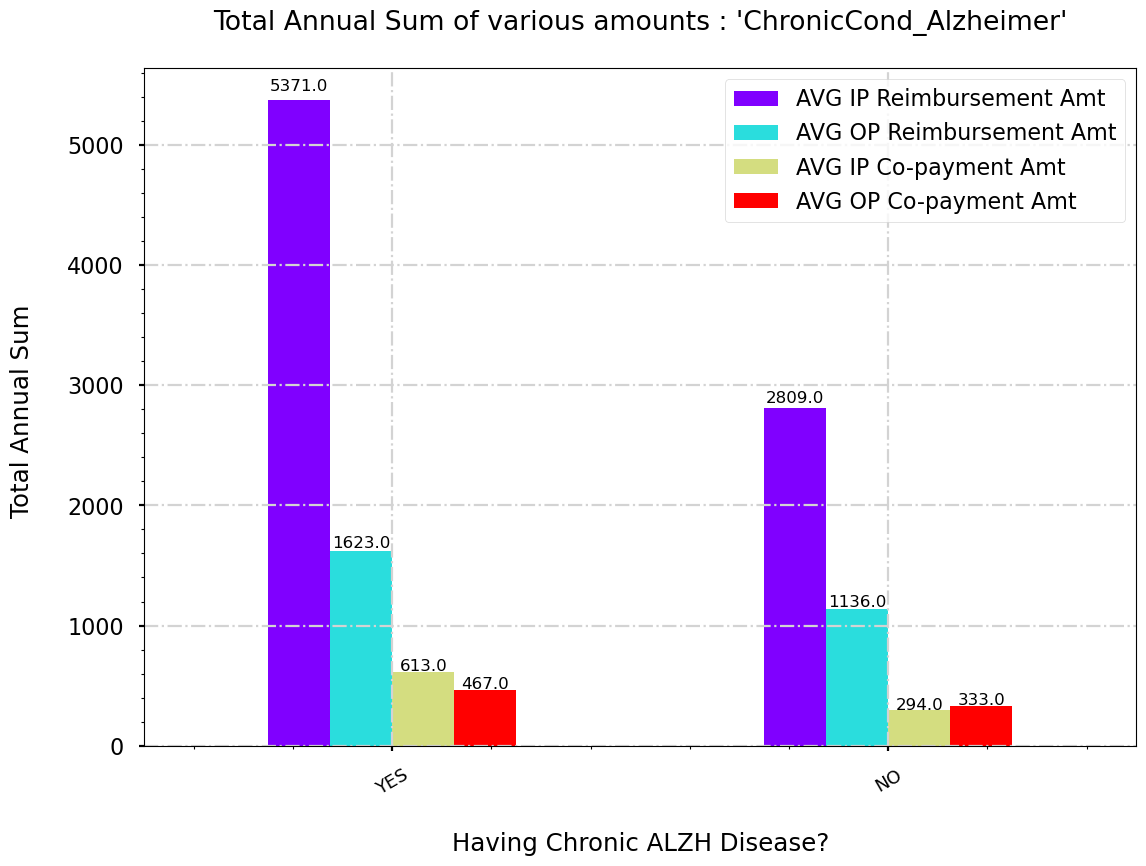

In [121]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_ALZH_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(CC_ALZH_all_amts,"\n")

OBSERVATION

The above graph is telling us below points:
Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic ALZH disease. To be more precise, in case of +ve it is more than 50%.
For other comparisons the difference is not very high.

Q10. Lets see the number of beneficiaries on the basis of 'ChronicCond_Heartfailure'. And, the Annual IP & OP expenditures for such patients.

In [123]:
# Number of beneficiaries with chronic or no-chronic conditions
pd.DataFrame(train_Ben.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())

,BeneID
ChronicCond_Heartfailure,
1,68402
2,70154


In [124]:
train_bene_df = train_Ben.copy()
CC_HF_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_HF_IP_R
CC_HF_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_HF_OP_R
CC_HF_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_D.columns = ['AVG IP Co-payment Amt']
CC_HF_IP_D
CC_HF_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_D.columns = ['AVG OP Co-payment Amt']
CC_HF_OP_D
CC_HF_all_amts = pd.concat([CC_HF_IP_R, CC_HF_OP_R, CC_HF_IP_D, CC_HF_OP_D], axis=1)
CC_HF_all_amts

,AVG IP Reimbursement Amt,AVG OP Reimbursement Amt,AVG IP Co-payment Amt,AVG OP Co-payment Amt
ChronicCond_Heartfailure,,,,
1,5421.714862,1670.718692,589.217421,477.322856
2,1942.965904,935.022664,215.206432,280.601149


                          AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Heartfailure                                                       
1                                      5421.714862               1670.718692   
2                                      1942.965904                935.022664   

                          AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Heartfailure                                                
1                                    589.217421             477.322856  
2                                    215.206432             280.601149   



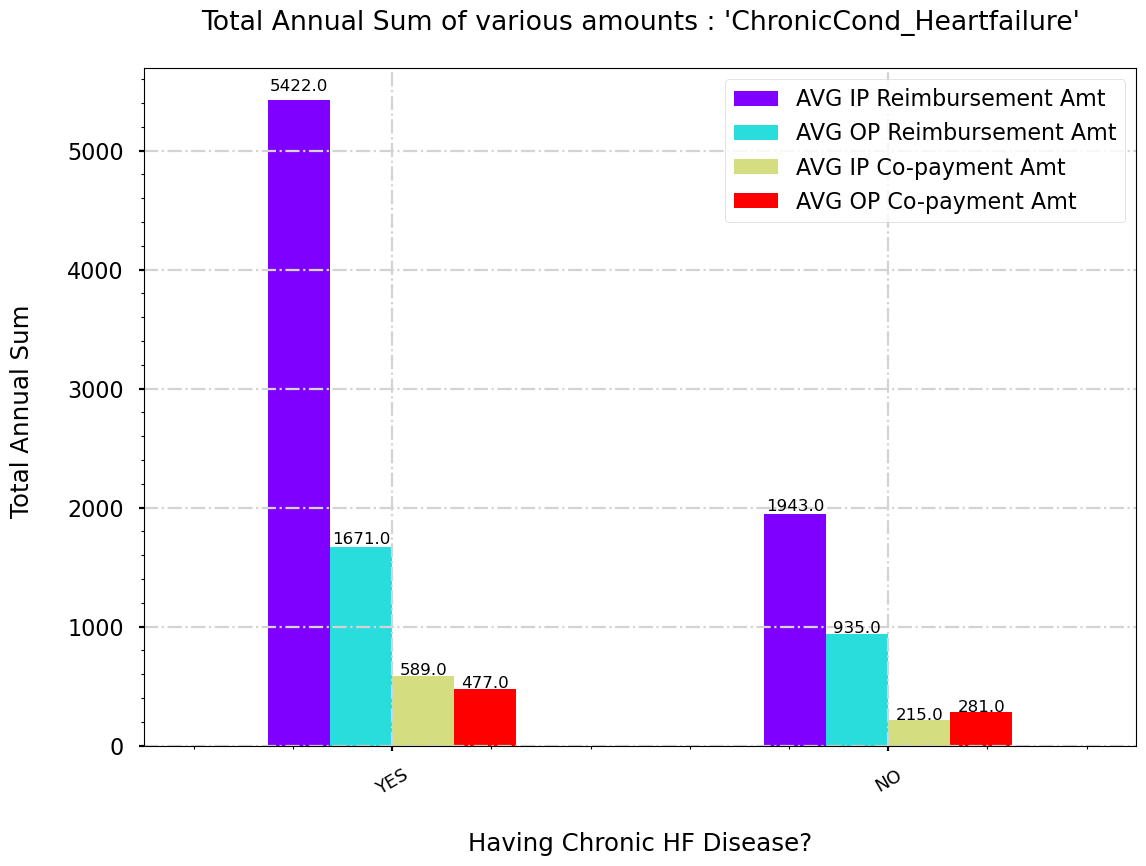

In [126]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Heartfailure'
with plt.style.context('seaborn-poster'):
  fig = CC_HF_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic HF Disease?")
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Heartfailure'\n")

# 1 means +ve with Chronic HF Disease
# 2 means -ve with Chronic HF Disease
print(CC_HF_all_amts,"\n")

OBSERVATION

The above graph is telling us below points:
Payer pays huge chunk of expenses specially when a beneficiary gets admitted with or without chronic HF disease. To be more precise, in case of +ve it is more than 50%.
For other comparisons the difference is not very high.

##### Q. Lets check the percentiles of the pre-disease indicators for the Annual IP expenditures for such patients.

In [129]:
def cal_display_percentiles(x_col, y_col, title_lbl, x_filter_code):
    """
    Description : This function is created for calculating and generating the percentiles for pre-disease indicators.
    
    Input: It accepts below parameters:
        1. x_col : Disease indicator feature name.
        2. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        3. title_lbl : Label to be provided in the title of the plot.
        4. x_filter_code : Category code for which you want to generate the percentiles.
        
    Output: It returns the dataframe having percentiles and their respective values for the specific disease indicator feature.
    And, it displays the pointplot graph of the same.
    """
    percentiles = []
    percentiles_vals = []

    # Calculating & storing the various percentiles and their respective values
    for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
        percentile = round(float(val*100),6)
        percentiles.append(percentile)

        percentile_val = round(train_bene_df[train_bene_df[x_col] == x_filter_code][y_col].quantile(val),1)
        percentiles_vals.append(percentile_val)

    # Creating the temp dataframe for displaying the results
    tmp_percentiles = pd.DataFrame([percentiles, percentiles_vals]).T
    tmp_percentiles.columns = ['Percentiles', 'Values']

    # Here, I'm displaying the Percentiles values for all disease code features
    with plt.style.context('seaborn-poster'):
        plt.figure(figsize=(15,7))
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="o", palette='spring')
        sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', markers="", color='grey', linestyles="solid")
        # Providing the labels and title to the graph
        plt.xlabel("\nPercentiles")
        plt.xticks(rotation=90, size=12)
        plt.ylabel("Total Annual `{}` Sum \n".format(y_col))
        plt.grid(which='major', linestyle="-.", color='lightpink')
        plt.minorticks_on()
        plt.title("Percentile values of `{}` :: `{}`\n".format(y_col,title_lbl))
        
    return tmp_percentiles

(RenalDiseaseIndicator == YES) and (IPAnnualReimbursementAmt)

C:\Users\Sheriff\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.501960

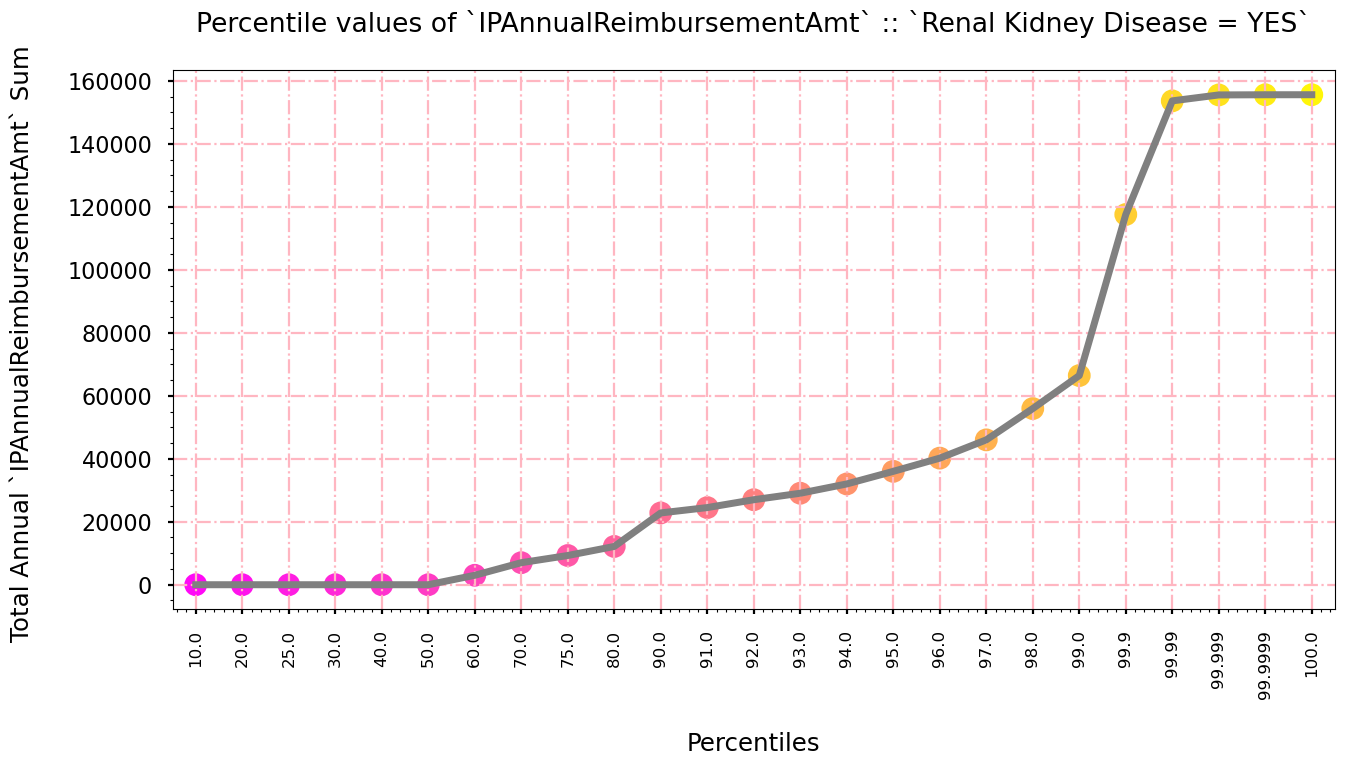

In [130]:
RKD_YES_IP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='IPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = YES",
                                                   x_filter_code='Y')

OBSERVATION

The above graph shows us that some of the reimbursements paid by the PAYER are very high as compared to the rest of the records.
This can be a potential sign of fraudulent cases because generally the criminals file some forge cases with exponentially high amounts.

(RenalDiseaseIndicator == NO) and (IPAnnualReimbursementAmt)

C:\Users\Sheriff\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.5019607843137255, 0.5019607843137255, 0.5019607843137255), (0.501960

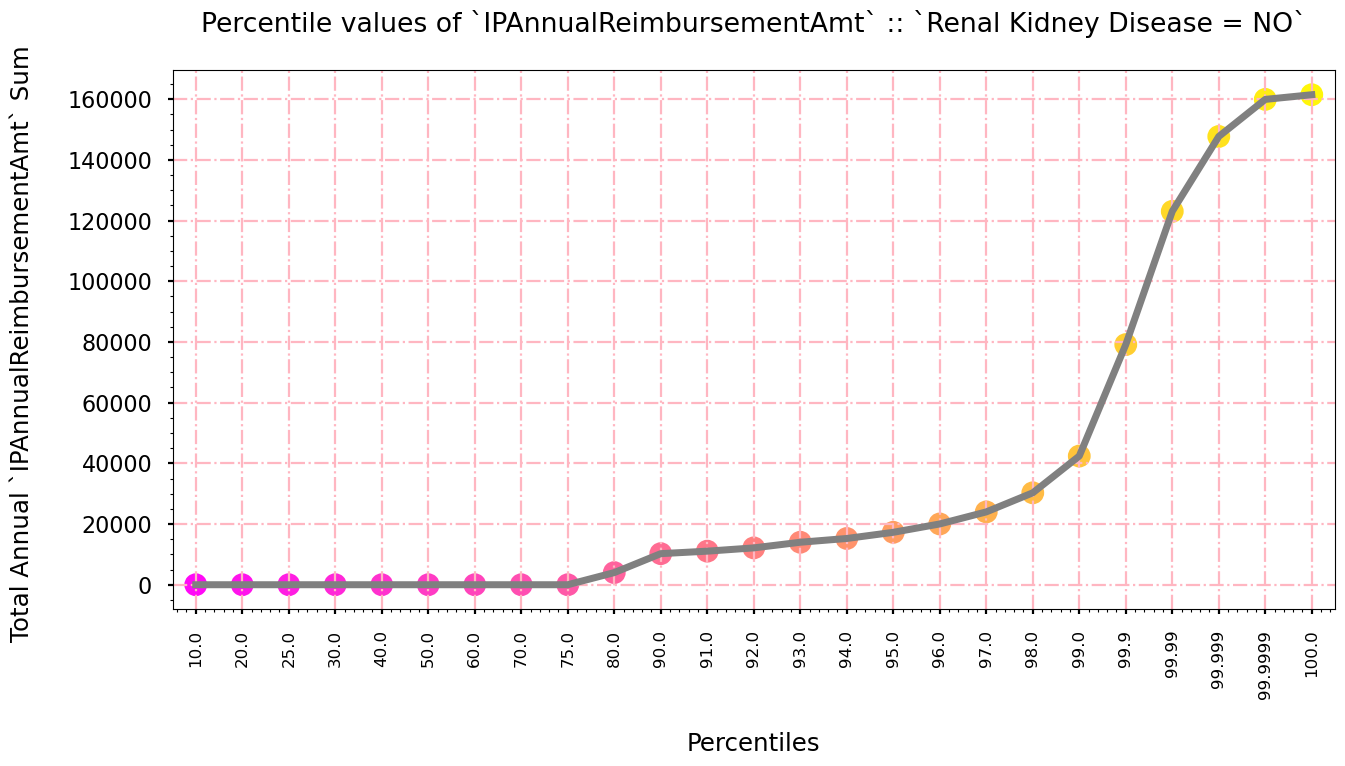

In [131]:
RKD_NO_IP_R_percentiles = cal_display_percentiles(x_col='RenalDiseaseIndicator', 
                                                   y_col='IPAnnualReimbursementAmt',
                                                   title_lbl="Renal Kidney Disease = NO",
                                                   x_filter_code='0')

OBSERVATION

The above graph shows us that some of the reimbursements paid by the PAYER are very high as compared to the rest of the records.
This can be a potential sign of fraudulent cases because generally the criminals file some forge cases with exponentially high amounts.

##### Q. Lets just visualize the spread of pre-disease indicators for the Annual IP and OP expenditures across males and females.

In [135]:
def plot_strip_plots(x_col, hue_col, y_col, lgd_title):
    """
    Description : This function is created for plotting the spread of data points of pre-disease indicators for the Annual IP and OP expenditures
    across males and females.
    
    Input: It accepts below parameters:
        1. x_col : Gender feature.
        2. hue_Col : Pre-Disease indicator
        3. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        4. lgd_title : Category code for which you want to generate the data spread.
        
    Output: It displays the stipplot graph of the same.
    """
    with plt.style.context('seaborn-poster'):
        plt.figure(figsize=(10,7))
        sns.stripplot(data=train_bene_df, x=x_col, y=y_col, hue=hue_col, palette='plasma')
        # Providing the labels and title to the graph
        plt.xlabel("\n{}".format(x_col))
        plt.xticks(rotation=90, size=12)
        plt.ylabel("{}\n".format(y_col))
        plt.grid(which='major', linestyle="-.", color='lightpink')
        plt.minorticks_on()
        plt.title("Spread of payment paid by payer\n")
        plt.legend(loc='upper center',title=lgd_title)

(RenalDiseaseIndicator) , (IPAnnualReimbursementAmt) and (GENDER)

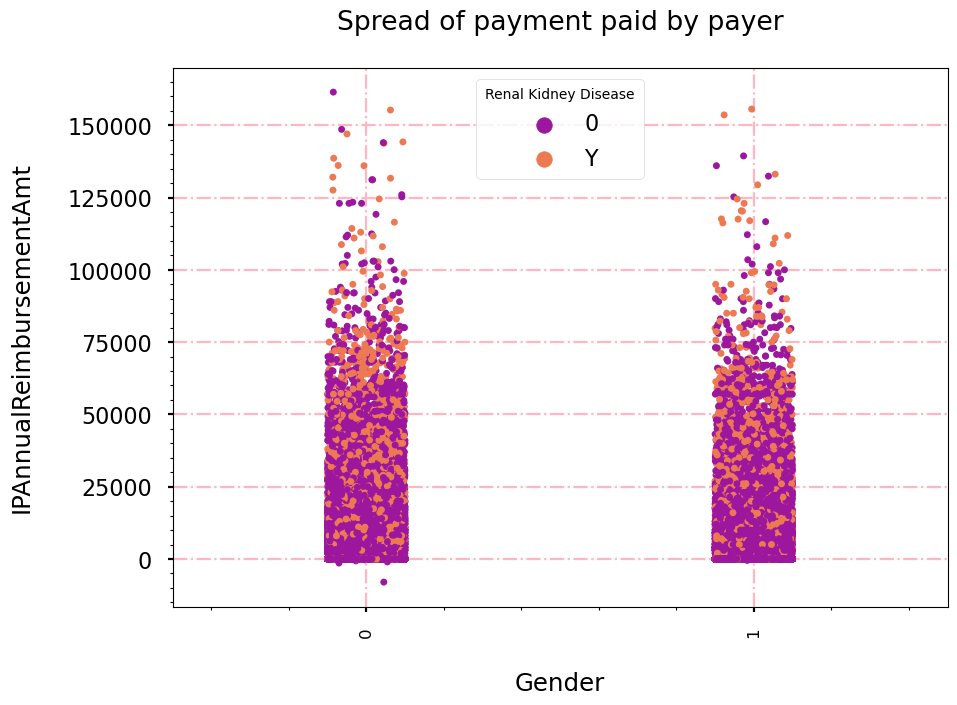

In [136]:
plot_strip_plots(x_col='Gender', hue_col="RenalDiseaseIndicator", y_col='IPAnnualReimbursementAmt', lgd_title="Renal Kidney Disease")

OBSERVATION

The above graph shows us the complete overlapping of data points with some potential outliers(may be fraud).
Here, another thing that I found is that few of the points lying in the negative range(this is quite strange may be error).

In [138]:
train_bene_df['OPAnnualReimbursementAmt'].min(), train_bene_df['IPAnnualReimbursementAmt'].min()

(-70, -8000)

(RenalDiseaseIndicator) , (OPAnnualReimbursementAmt) and (GENDER)

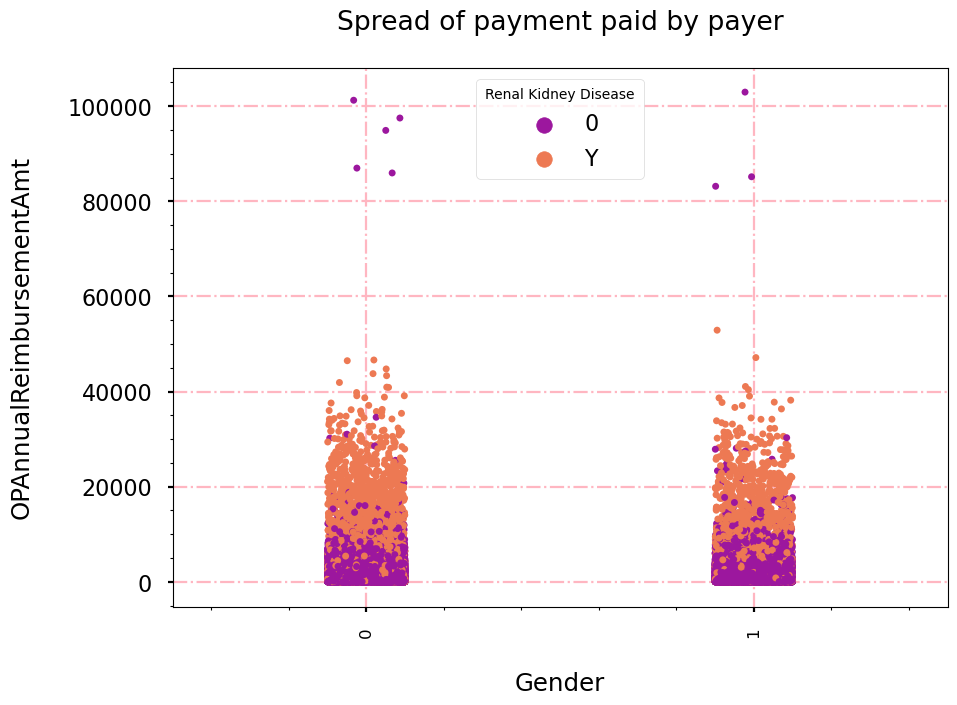

In [139]:
plot_strip_plots(x_col='Gender', hue_col="RenalDiseaseIndicator", y_col='OPAnnualReimbursementAmt', lgd_title="Renal Kidney Disease")

OBSERVATION

The above graph shows us the complete overlapping of data points with some potential outliers(may be fraud).
Here, another thing taht I found is that few of the points lying in the negative range(this is quite strange may be error).

##### Q. Lets visualize the spread of Annual IP and OP expenditures through out the AGE and its assciated features for males and females.

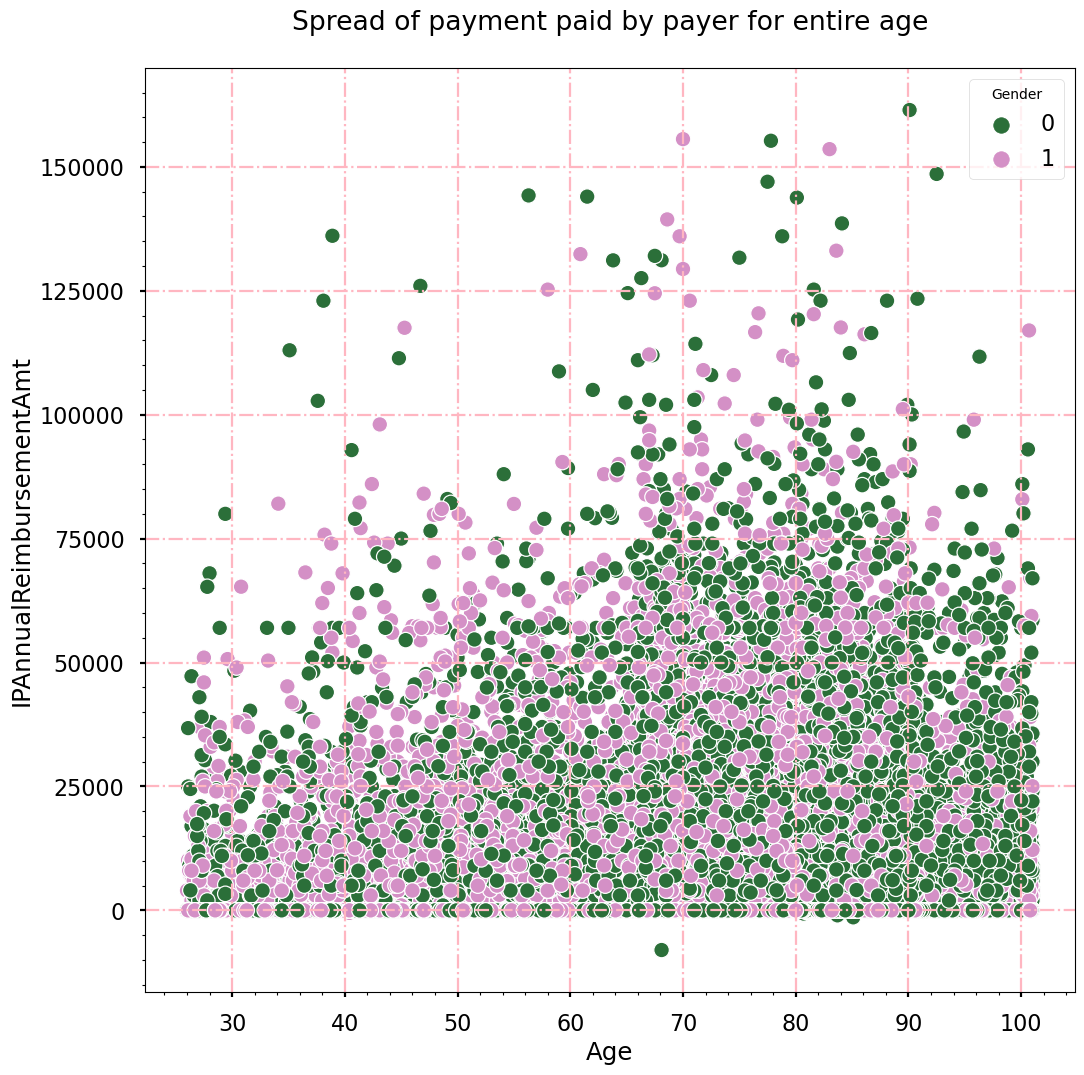

In [142]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,12))
    sns.scatterplot(data=train_bene_df, x='Age', y='IPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.grid(which='major', linestyle="-.", color='lightpink')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer for entire age\n")


OBSERVATION

The above graph shows us the complete overlapping of data points.

(AGE GROUPS) , (IPAnnualReimbursementAmt) and (GENDER)

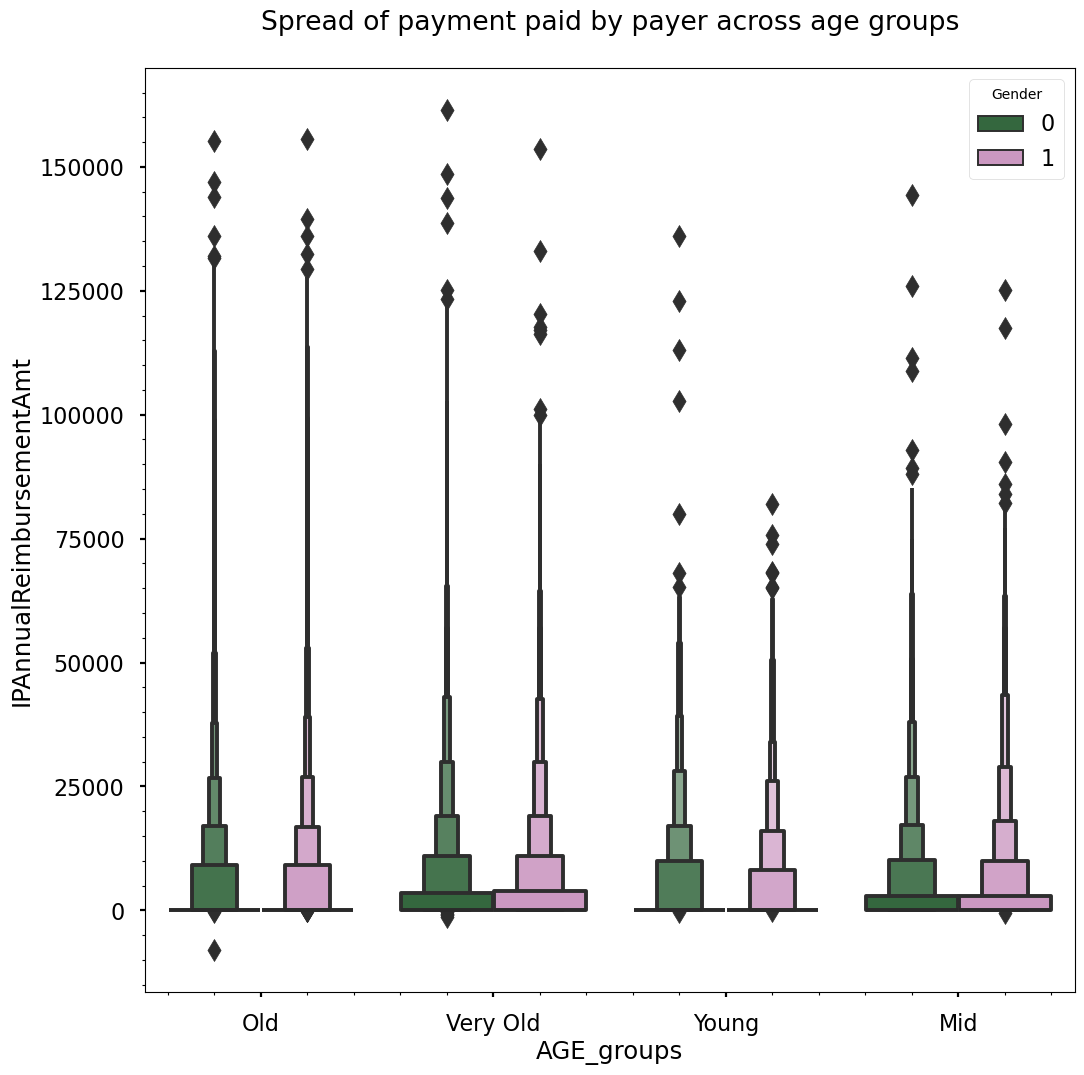

In [144]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,12))
    sns.boxenplot(data=train_bene_df, x='AGE_groups', y='IPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer across age groups\n")


OBSERVATION

The above graph shows us there is no such difference in the amounts across different AGE Groups.

(AGE GROUPS) , (OPAnnualReimbursementAmt) and (GENDER)

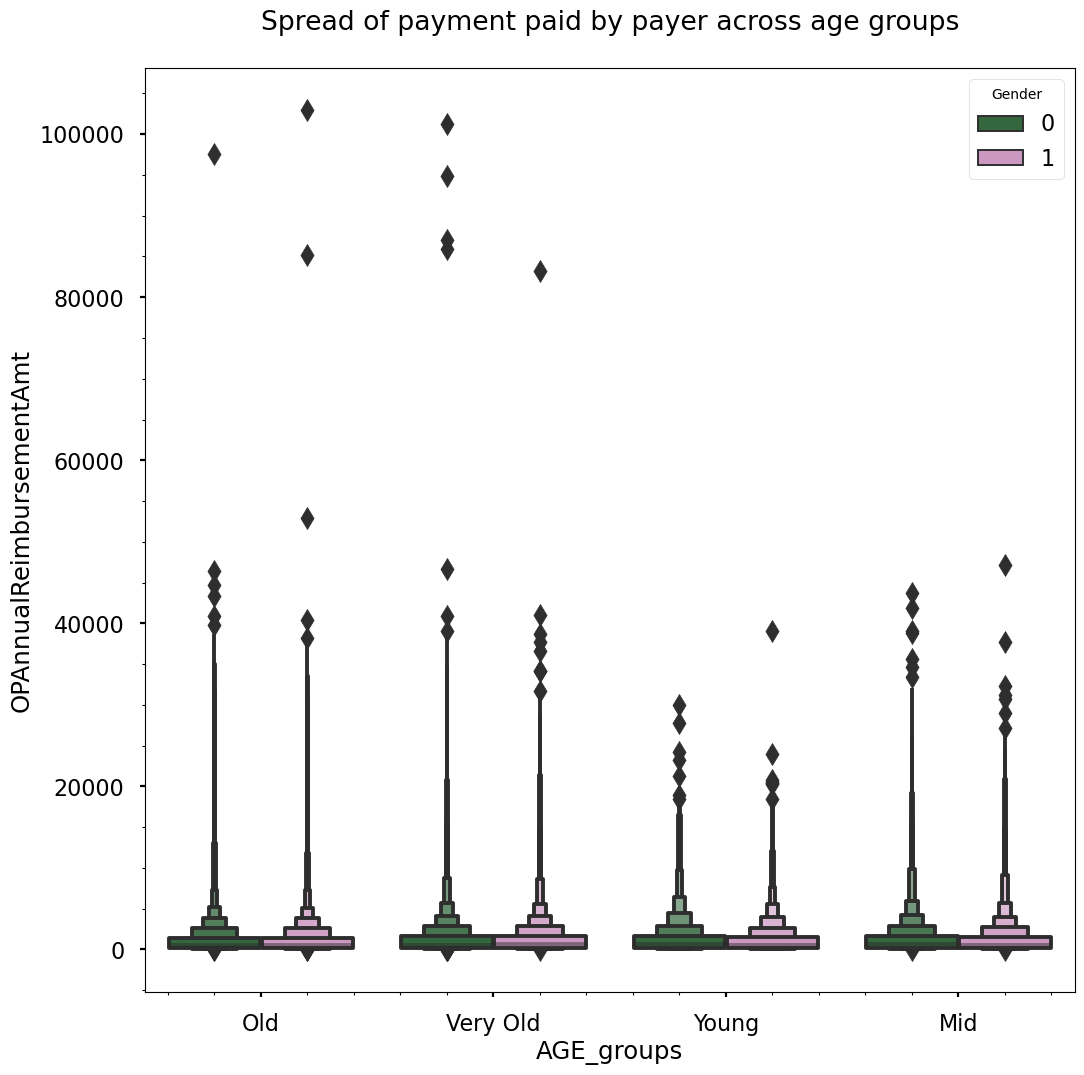

In [146]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,12))
    sns.boxenplot(data=train_bene_df, x='AGE_groups', y='OPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer across age groups\n")

OBSERVATION

The above graph shows us there is no such difference in the amounts across different AGE Groups.

(DOB MONTH) , (IPAnnualReimbursementAmt) and (GENDER)

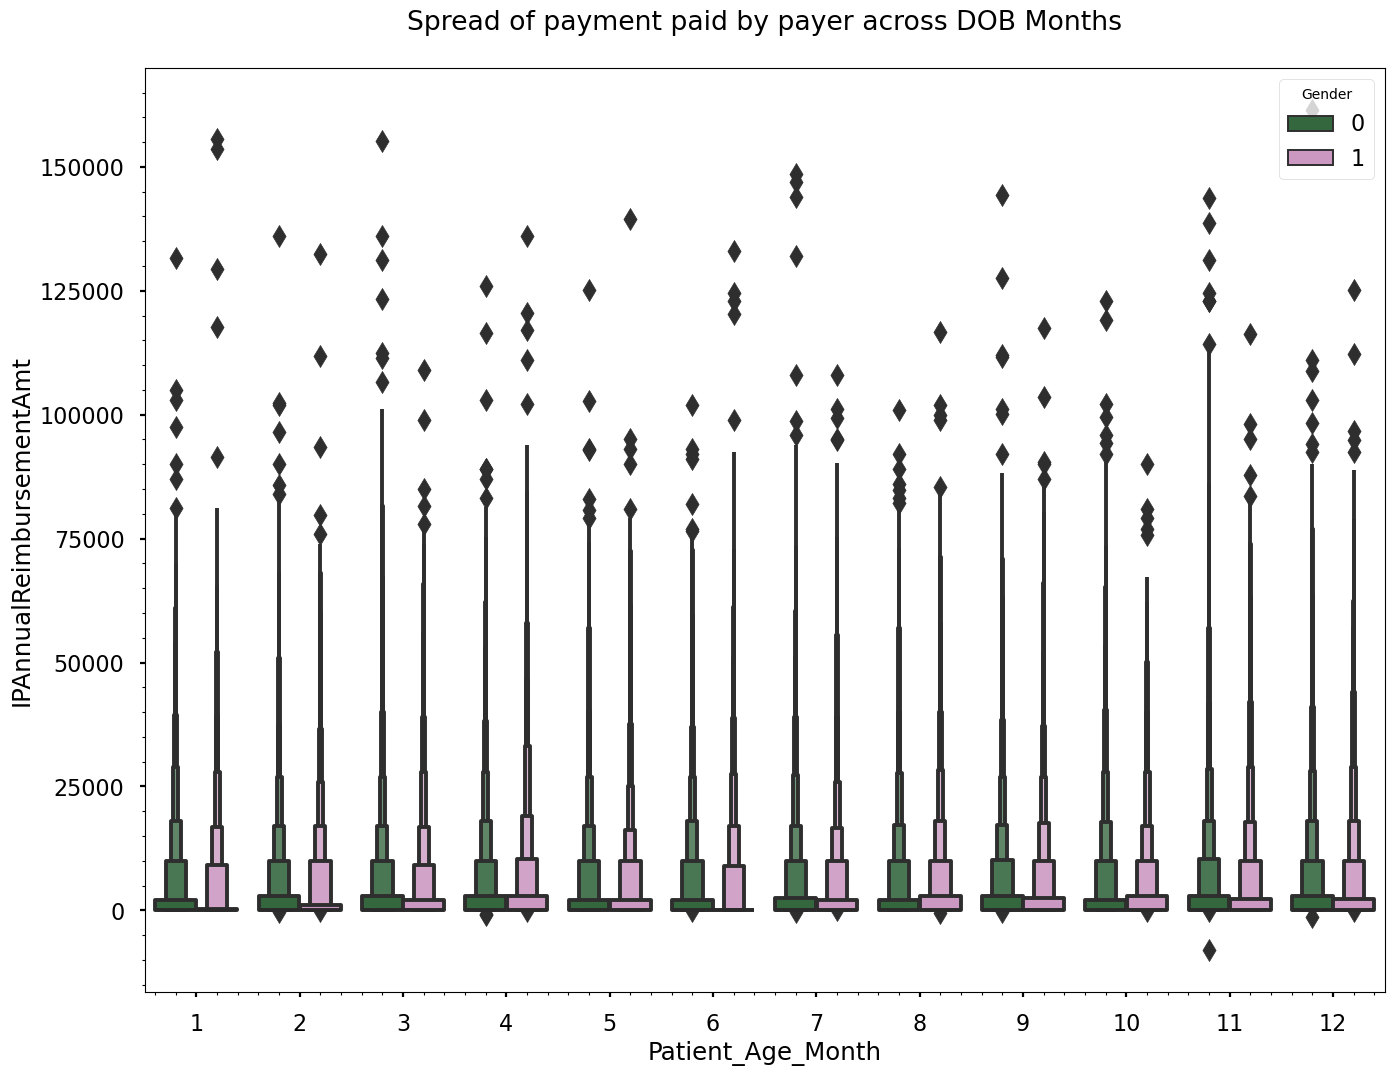

In [149]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,12))
    sns.boxenplot(data=train_bene_df, x='Patient_Age_Month', y='IPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer across DOB Months\n")
    plt.legend(loc='upper right', title="Gender")

OBSERVATION

The above graph shows us there is no such difference in the amounts across different AGE Groups.

(DOB MONTH) , (OPAnnualReimbursementAmt) and (GENDER)

#### BENE - EDA - SUMMARY
For the below mentioned features, based on the above initial analysis it looks like these might not be able to provide much information or differentiation but still I would like to check them after adding CLAIMS data.

DOB YEAR

DOB MONTH

AGE GROUPS

LIFE STATUS

HUMAN RACE

STATE

For the below mentioned features majority of the values are same which most probably won't be of any use thus removing these from BENE dataset.

NoOfMonths_PartACov

NoOfMonths_PartBCov

The Pre-disease indicators looks like important features based on the initial analysis thus it would interesting to see how much they are useful after adding CLAIMS dataset.

Date of Death is also removed from the dataset, as we have already calculated bene age, life status and others out of it.

In [151]:
train_Ben.drop(["NoOfMonths_PartACov", "NoOfMonths_PartBCov"], axis=1, inplace=True)

In [154]:
train_Ben.shape

(138556, 27)

In [153]:
train_Ben.to_csv("train_bene_1.csv")